<div style="text-align: left; background-color:#4e4e4e; font-family: Trebuchet MS; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 38px;border-style: solid;border-color: dark green;">Cholesterol: What are the indicators?</div>

<br> </br>
<div>    

<img src="https://www.cdc.gov/cholesterol/images/arteries.jpg?_=17097" width="550/">    
</div>

<div style="text-align: left; background-color:#4e4e4e; font-family: Trebuchet MS; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 12px;border-style: solid;border-color: dark green;"><p><b><a href="https://www.cdc.gov/cholesterol/about.htm" target="">Image source</a></b></p></div>


# 0. **Introduction** <a class="anchor" id="0"></a>
" Kolesterol merupakan zat lemak mirip lilin yang ada di dalam darah dan diproduksi secara alami oleh tubuh. Zat ini memiliki peran krusial dalam pembentukan sel-sel tubuh, vitamin D, dan beberapa hormon. Namun, ketika kadar kolesterol dalam darah meningkat, hal ini dapat menjadi masalah kesehatan serius. Kadar kolesterol yang tinggi dapat menyebabkan penumpukan lemak pada dinding pembuluh darah, mengakibatkan penyempitan dan pengerasan (aterosklerosis).

Kondisi ini dapat menghambat aliran darah ke organ penting seperti jantung dan otak, meningkatkan risiko terjadinya **penyakit kardiovaskular** seperti **serangan jantung, stroke,** dan **penyakit arteri perifer**. Meskipun memiliki dampak negatif, tubuh tetap memerlukan kolesterol dalam jumlah yang tepat. Oleh karena itu, menjaga kadar kolesterol dalam kisaran normal sangat penting untuk kesehatan secara keseluruhan." [[1](https://www.hopkinsmedicine.org/health/wellness-and-prevention/cholesterol-5-truths-to-know)] [[2](https://www.heart.org/en/health-topics/cholesterol/about-cholesterol#:~:text=Cholesterol%20can%20join%20with%20other,health%20care%20professional%20if%20needed.)] [[3](https://world-heart-federation.org/what-we-do/cholesterol/#:~:text=The%20liver%20either%20makes%20cholesterol,or%207.8%25%20of%20all%20deaths.)]

<blockquote style="margin-right:auto; margin-left:auto; color:white; background-color:#4e4e4e; padding: 1em; margin:24px;">

<font color="white" size=+1.0><b>Key facts according to WHO (World Health Organaizations)</b></font>  
        
<ul>
<li> Kadar kolesterol tinggi merupakan faktor risiko utama untuk penyakit jantung koroner, penyebab utama kematian global. Secara global, sepertiga dari penyakit jantung iskemik disebabkan oleh kolesterol tinggi 
<li> Diperkirakan 2,6 juta kematian (4,5% dari total) dan 29,7 juta DALYs (2% dari total) disebabkan oleh peningkatan kolesterol. (DALY: Disability-Adjusted Life Years -satuan untuk mengukur beban penyakit)
<li> Kolesterol tinggi tidak memiliki gejala khusus.
<li> Kolesterol tinggi merupakan faktor risiko utama penyakit jantung koroner, stroke, dan penyakit pembuluh darah tepi.
<li> Secara global, peningkatan kadar kolesterol LDL ("jahat") yang tinggi menjadi penyebab kematian lebih dari 1,8 juta orang setiap tahun.
<li> Dengan skrining rutin dan intervensi dini, risiko komplikasi akibat kolesterol tinggi dapat diminimalkan.                                                                                                                                
    
</ul>        
</blockquote>

#### **Objectives**

* Faktor-faktor kesehatan apa yang paling berpengaruh terhadap nilai kolesterol total (CT).

#### **Output yang diharapkan:**
* Statistika deskriptif dari setiap variabel-variabel yang diukur.
* Mencari korelasi antar variabel yang akan diolah.
* Memodelkan koresterol total dan variabel yang memengaruhinya.
* Mendapatkan faktor-faktor apa yang paling berpengaruh terhadap koresterol total.
* Menginterpretasikan hasil pemodelan.

---

<a id="top"></a>

## **Table of Contents**

* [0. Introduction](#0)
* [1. Exploratory Data Analysis](#1)
    * [1.1 Data Dictionary](#1.1)
    * [1.2 Data Pre-processing](#1.2)
    * [1.3 Exploring Features](#1.3)
    * [1.4 Correlations Heatmap](#1.4)
    * [1.5 EDA Summary](#1.5)
* [2. Predictions](#2)
    * [2.1 Evaluate Pre-processing](#2.1)
    * [2.2 Evaluating Feature Selection](#2.2)
    * [2.3 Modelling](#2.3)
    * [2.4 Hyperparameter Tunning Best Model](#2.4)
    * [2.5 Performance Metric](#2.5)
    * [2.6 Model Explainablity](#2.6)
    * [2.7 Hard Voting](#2.7)
    * [2.8 Soft Voting](#2.8)
* [3. Concluding Remarks](#3)
* [4. Reference](#4)


---
# 1. **Exploratory Data Analysis** <a class="anchor" id="1"></a>
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from collections import Counter
import os
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import skew
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from statistics import stdev
import warnings

warnings.filterwarnings('ignore')

In [11]:
data=pd.read_excel('/kaggle/input/data-karyawan/Data Kesehatan Karyawan-Data 1  Data 2.xlsx', sheet_name='Data 2')

In [12]:
data.head()

,Responden,Jenis Kelamin,Usia,Tekanan darah (S),Tekanan darah (D),Tinggi badan (cm),Berat badan (kg),IMT (kg/m2),Lingkar perut (cm),Glukosa Puasa (mg/dL),Cholesterol Total (mg/dL),Trigliserida (mg/dL),Fat,Visceral Fat,Masa Kerja,Tempat lahir
0,1,M,19,126,88,172.5,49.5,16.53,66.0,84,187,99,26.4,6.0,0.971199,Purworejo
1,2,M,19,120,80,158.0,53.6,21.50,71.0,84,187,99,26.4,6.0,0.600000,Bogor
2,3,M,19,120,80,170.0,59.5,20.59,80.0,80,187,99,26.4,6.0,1.373939,bandung
3,4,F,19,100,70,149.0,45.1,20.31,62.0,81,187,99,30.5,3.5,1.000000,Jakarta
4,5,M,19,110,70,171.6,62.4,21.19,78.0,84,187,99,26.4,6.0,4.000000,Teluk Betung


In [13]:
#data = data.drop(columns=['Responden'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Jenis Kelamin              1339 non-null   object 
 1   Usia                       1339 non-null   int64  
 2   Tekanan darah  (S)         1339 non-null   int64  
 3   Tekanan darah  (D)         1339 non-null   int64  
 4   Tinggi badan (cm)          1339 non-null   float64
 5   Berat badan (kg)           1339 non-null   float64
 6   IMT (kg/m2)                1339 non-null   float64
 7   Lingkar perut (cm)         1339 non-null   float64
 8   Glukosa Puasa (mg/dL)      1339 non-null   int64  
 9   Cholesterol Total (mg/dL)  1339 non-null   int64  
 10  Trigliserida (mg/dL)       1339 non-null   int64  
 11  Fat                        1339 non-null   float64
 12  Visceral Fat               1339 non-null   float64
 13  Masa Kerja                 1339 non-null   float

---
## 1.1 **Data Dictionary** <a class="anchor" id="1.1"></a>

1. Jenis Kelamin
    * 1 = Pria
    * 0 = Wanita
2. Usia: Usia (Tahun)
3. Tekanan Darah (S): tekanan darah pada saat jantung berkontraksi
4. Tekanan Darah (D) : tekanan darah pada saat jantung beristirahat
5. Tinggi Badan (cm)
6. Berat Badan (kg)
7. IMT (kg/m2): Indeks Massa Tubuh
    * kurang dari 18,5 : Kurus
    * 18,5-24,9: Normal
    * 25-29,9: Kegemukan
    * 30 atau lebih :Obesitas
8. Lingkar perut (cm): ukuran lingkar dari area di sekitar pinggang
9. Glukosa Puasa (mg/dL): kadar glukosa dalam darah setelah seseorang puasa selama minimal 8 jam
10. Trigliserida (mg/dL): kadar lemak dalam darah
10. Fat: jumlah total lemak tubuh 
11. Visceral Fat: jumlah lemak tubuh yang terletak di sekitar organ dalam tubuh, seperti hati, pankreas, dan usus
12. Masa Kerja: jumlah waktu yang telah dihabiskan seseorang dalam bekerja
13. Tempat Lahir: tempat dilahirkan
14. Cholesterol Total: 
    * 0 = Normal
    * 1 = Tinggi
---    
**Note on the target label**:

`Diagnosis of Cholesterol Total
Nilai 0: < 200 Normal
Nilai 1: >= 200 Tinggi`

<a href="#top">☝️ Top</a>

## 1.2 **Data pre-processing** <a class="anchor" id="1.2"></a>
### 1.2.1 Binning Data
Ubah data numerik menjadi kategorik berdasarkan kategorinya untuk variabel `IMT` dan `Cholesterol Total`

In [15]:
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Kurus', 'Normal', 'Kegemukan', 'Obesitas']
data['IMT (kg/m2)'] = pd.cut(data['IMT (kg/m2)'], bins=bins, labels=labels, right=False)

In [16]:
def diagnosis_cholesterol(cholesterol):
    if cholesterol < 200:
        return 'Normal'
    else:
        return 'Tinggi'

data['Cholesterol Total (mg/dL)'] = data['Cholesterol Total (mg/dL)'].apply(diagnosis_cholesterol)

### 1.2.2 Grouping Features (by data type)
* Dapat terlihat sebelumnya ada 3 tipe data i.e **object**, **int** and **floats**. Disini kita akan mengelompokkannya berdasarkan tipe data tersebut


In [17]:
# Numerical Features
num_feats = ['Usia','Tekanan darah  (S)', 'Tekanan darah  (D)', 'Tinggi badan (cm)', 'Berat badan (kg)', 'Lingkar perut (cm)', 'Glukosa Puasa (mg/dL)', 'Trigliserida (mg/dL)', 'Fat', 'Visceral Fat', 'Masa Kerja']
# Categorical (binary)
bin_feats = ['Jenis Kelamin', 'Cholesterol Total (mg/dL)']
# Caterorical (multi-)
nom_feats= ['IMT (kg/m2)', 'Tempat lahir', 'Pulau']
cat_feats = nom_feats + bin_feats

## 1.3 **Exploring Features/Target** <a class="anchor" id="1.3"></a>

Dalam tahapan ini, kita akan mempelajari semua fitur (termasuk target) secara mendetail.  Jika memungkinkan, kita akan melihat ringkasan statistik dan distribusi dari beberapa fitur tersebut, dimulai dari target.

### 1.3.1 Target distribution
 
Berdasarkan analisis data, terlihat bahwa target (variabel dependen) tidak seimbang. Ini berarti bahwa proporsi kelas mayoritas (normal) jauh lebih besar daripada proporsi kelas minoritas (tinggi). Ketidakseimbangan ini dapat menyebabkan beberapa masalah pada model klasifikasi:

* Klasifikasi bias: Model cenderung mengklasifikasikan semua contoh sebagai kelas mayoritas karena lebih mudah dipelajari dan menghasilkan akurasi yang lebih tinggi secara keseluruhan. Hal ini dapat menyebabkan misklasifikasi yang signifikan untuk kelas minoritas, yang dapat berakibat fatal dalam beberapa kasus, seperti diagnosis penyakit langka.
* Penurunan kinerja: Model mungkin tidak dapat mempelajari pola yang membedakan kelas minoritas dengan baik karena kurangnya data. Hal ini dapat menyebabkan penurunan akurasi model secara keseluruhan, bahkan untuk kelas mayoritas [[14]](https://imbalanced-learn.org/stable/index.html).

Ketidakseimbangan target ini meningkatkan urgensi untuk melakukan **oversampling**. Oversampling adalah teknik yang meningkatkan jumlah data di kelas minoritas dengan membuat sampel sintetis baru. Hal ini dapat membantu menyeimbangkan dataset dan mengatasi masalah yang disebutkan di atas [[15]](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/).

Salah satu teknik oversampling adalah **SMOTE**. SMOTE (Synthetic Minority Over-sampling Technique) adalah salah satu teknik oversampling yang paling populer. SMOTE memiliki beberapa keuntungan dibandingkan teknik oversampling lainnya:

* Efisien: SMOTE menghasilkan sampel sintetis baru dengan menggunakan interpolasi linear antara contoh-contoh yang ada di kelas minoritas. Hal ini membuatnya lebih efisien dibandingkan teknik oversampling lain yang membutuhkan komputasi yang lebih berat.
* Mencegah overfitting: SMOTE menghasilkan sampel sintetis baru di sekitar contoh-contoh yang ada, sehingga membantu mencegah overfitting.
* Meningkatkan kinerja: SMOTE telah terbukti meningkatkan kinerja model klasifikasi dalam berbagai kasus ketidakseimbangan target. [[16]](http://https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)


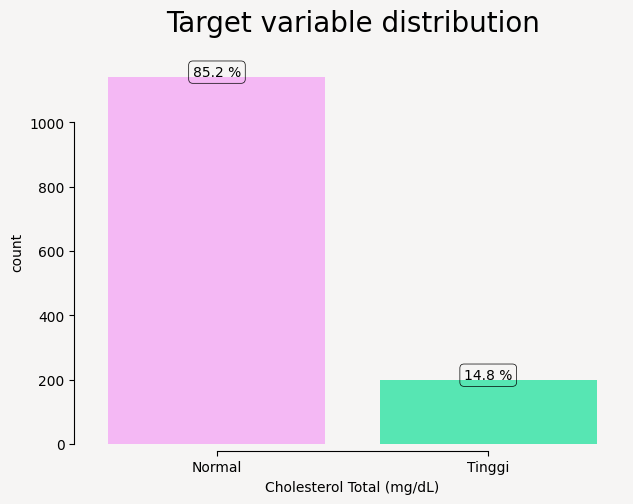

In [18]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(data))
ax = sns.countplot(x=data['Cholesterol Total (mg/dL)'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

In [19]:
def oversamp(df):
    high = df[df['Cholesterol Total (mg/dL)'] == 'Normal']
    non_high = df[df['Cholesterol Total (mg/dL)'] == 'Tinggi']
    print(len(high))
    print(len(non_high))
    oversampled = high.sample(len(non_high),replace = True)
    df = pd.concat([non_high,oversampled])
    return df

df = oversamp(data)

1141
198


### 1.3.2 Numerical Features

#### Statistical summary

For the numerical features we can apply the handy pandas `data.describe()` method and get the global statistical summary. Key figures are highlighted below.

In [20]:
data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
Usia,1339.0,28.597461,4.767230,19.0,25.000,28.0,31.000,39.00
Tekanan darah (S),1339.0,113.147872,10.164592,80.0,110.000,110.0,120.000,170.00
Tekanan darah (D),1339.0,74.009709,7.718752,58.0,70.000,72.0,80.000,100.00
Tinggi badan (cm),1339.0,164.940851,7.386617,138.5,160.000,165.0,170.000,187.50
Berat badan (kg),1339.0,64.620503,12.799095,38.5,55.275,62.5,71.775,139.75
Lingkar perut (cm),1339.0,80.441972,10.688215,54.0,72.000,80.0,87.000,128.00
Glukosa Puasa (mg/dL),1339.0,84.571322,11.522057,65.0,84.000,84.0,84.000,321.00
Trigliserida (mg/dL),1339.0,106.982823,44.143456,34.0,99.000,99.0,99.000,634.00
Fat,1339.0,26.203510,3.678467,5.8,26.400,26.4,26.400,40.90
Visceral Fat,1339.0,6.231367,2.431923,0.5,6.000,6.0,6.000,23.00


### **Statistical summary of the numerical features**

<blockquote style="margin-right:auto; margin-left:auto; color:white; background-color: #4e4e4e; padding: 1em; margin:24px;">
   
<ul>
<li> <font color="white" size=+1.0><b>Usia</b></font> :
    <ul>
    <li> Rata-rata usia responden adalah 29 Tahun
    <li> Responden tertua berusia 39 Tahun, sementara responden termuda berusia 19 Tahun
    </ul>
<li> <font color="white" size=+1.0><b>Tekanan Darah Sistolik </b></font>
    <ul>
    <li> Rata-Rata Tekanan Darah Sistolik Responden adalah 113 mmHg
    <li> Tekanan Darah Sistolik Responden paling tinggi adalah 170 mmHG dan Tekanan Darah Minimum adalah 80 mmHG
    <li> <strong>Note</strong>: According to [4], Tekanan Darah sistolik ada beberapa indikator
Untuk Orang dewasa (18 tahun ke atas):

Normal: < 120 mmHg
             
Pre-hipertensi: 120-129 mmHg
             
Hipertensi stadium 1: 130-139 mmHg
             
Hipertensi stadium 2: ≥ 140 mmHg
             
Lansia (65 tahun ke atas):

Normal: < 130 mmHg
        
Pre-hipertensi: 130-139 mmHg
        
Hipertensi stadium 1: 140-159 mmHg
        
Hipertensi stadium 2: ≥ 160 mmHg     
    </ul>
<li> <font color="white" size=+1.0><b>Tekanan Darah Diastolik:</b></font>
    <ul>
    <li> Rata-Rata Tekanan Darah Diastolik Responden adalah 74 mmHg
    <li> Tekanan Darah Diastolik Responden paling tinggi adalah 100 mmHG dan Tekanan Darah Minimum adalah 58 mmHG
    <li> <strong>Note</strong>: According to [4], Tekanan Darah diastolik ada beberapa indikator:

Normal: < 80 mmHg
            
Pre-hipertensi: 80-84 mmHg
            
Hipertensi stadium 1: 85-89 mmHg
            
Hipertensi stadium 2: ≥ 90 mmHg 
    </ul>
<li> <font color="white" size=+1.0><b>Tinggi Badan:</b></font>
    <ul>
    <li> Rata-rata tinggi badan responden adalah 164 cm, paling rendah adalah 138,5 cm dan paling tinggi adalah 187,5 cm.
    </ul>
<li> <font color="white" size=+1.0><b>Berat Badan</b></font>
    <ul>
    <li> Rata-rata berat badan responden adalah 65 kg. Dengan paling berat adalah 139,75 kg, yang paling ringan di berat 55 kg
    </ul>
<li> <font color="white" size=+1.0><b>Lingkar Perut</b></font>
    <ul>
    <li> Rata-rata lingkar perut responden adalah 80 cm, paling kecil adalah 54 cm dan paling besar adalah 128 cm.
    </ul>
<li> <font color="white" size=+1.0><b>Glukosa Puasa</b></font>
    <ul>
    <li> Rata-rata Glukosa Puasa Responden adalah 85 mg/dL, paling banyak adalah 321 mg/dL, dan paling sedikit adalah 65 mg/dL.
<li> <strong>Note</strong>: According to [5], Glukosa gula darah yang baik itu berada di $<100 mg/dl$
    </ul>
<li> <font color="white" size=+1.0><b>Trigliserida (mg/dL)</b></font>
    <ul>
    <li> Rata-rata trigliserida responden adalah 107 mg/dL, paling rendah adalah 34 mg/dL dan paling tinggi adalah 321 mg/dL.
<li> <strong>Note</strong>: According to [6], Trigliserida yang baik itu berada di $<150 mg/dl$
    </ul>
<li> <font color="white" size=+1.0><b>Fat</b></font>
    <ul>
    <li> Rata-rata lemak tubuh responden adalah 26%, paling rendah adalah 5.8% dan paling tinggi adalah 141%.
<li> <strong>Note</strong>: According to [7], kadar normal lemak 25-31 persen tubuh untuk wanita, dan 18-25 persen tubuh untuk pria.
    </ul>
<li> <font color="white" size=+1.0><b>Visceral Fat</b></font>
    <ul>
    <li> Rata-rata lemak tubuh responden adalah 26%, paling rendah adalah 5.8% dan paling tinggi adalah 141%.
<li> <strong>Note</strong>: According to [8], Ratio normal visceral fat bagi pria adalah kurang dari 0.9 dan wanita kurang dari 0.84.
    </ul>
<li> <font color="white" size=+1.0><b>Masa Kerja</b></font>
    <ul>
    <li> Rata-rata masa kerja responden adalah 6 tahun, paling baru tidak sampai 1 tahun dan paling lama adalah 31 tahun
    </ul>
</ul>                                                                                                                                             
</blockquote>

<a href="#top">☝️ Back to top</a>                                                                                                                                                   

#### Distribution: Density plots

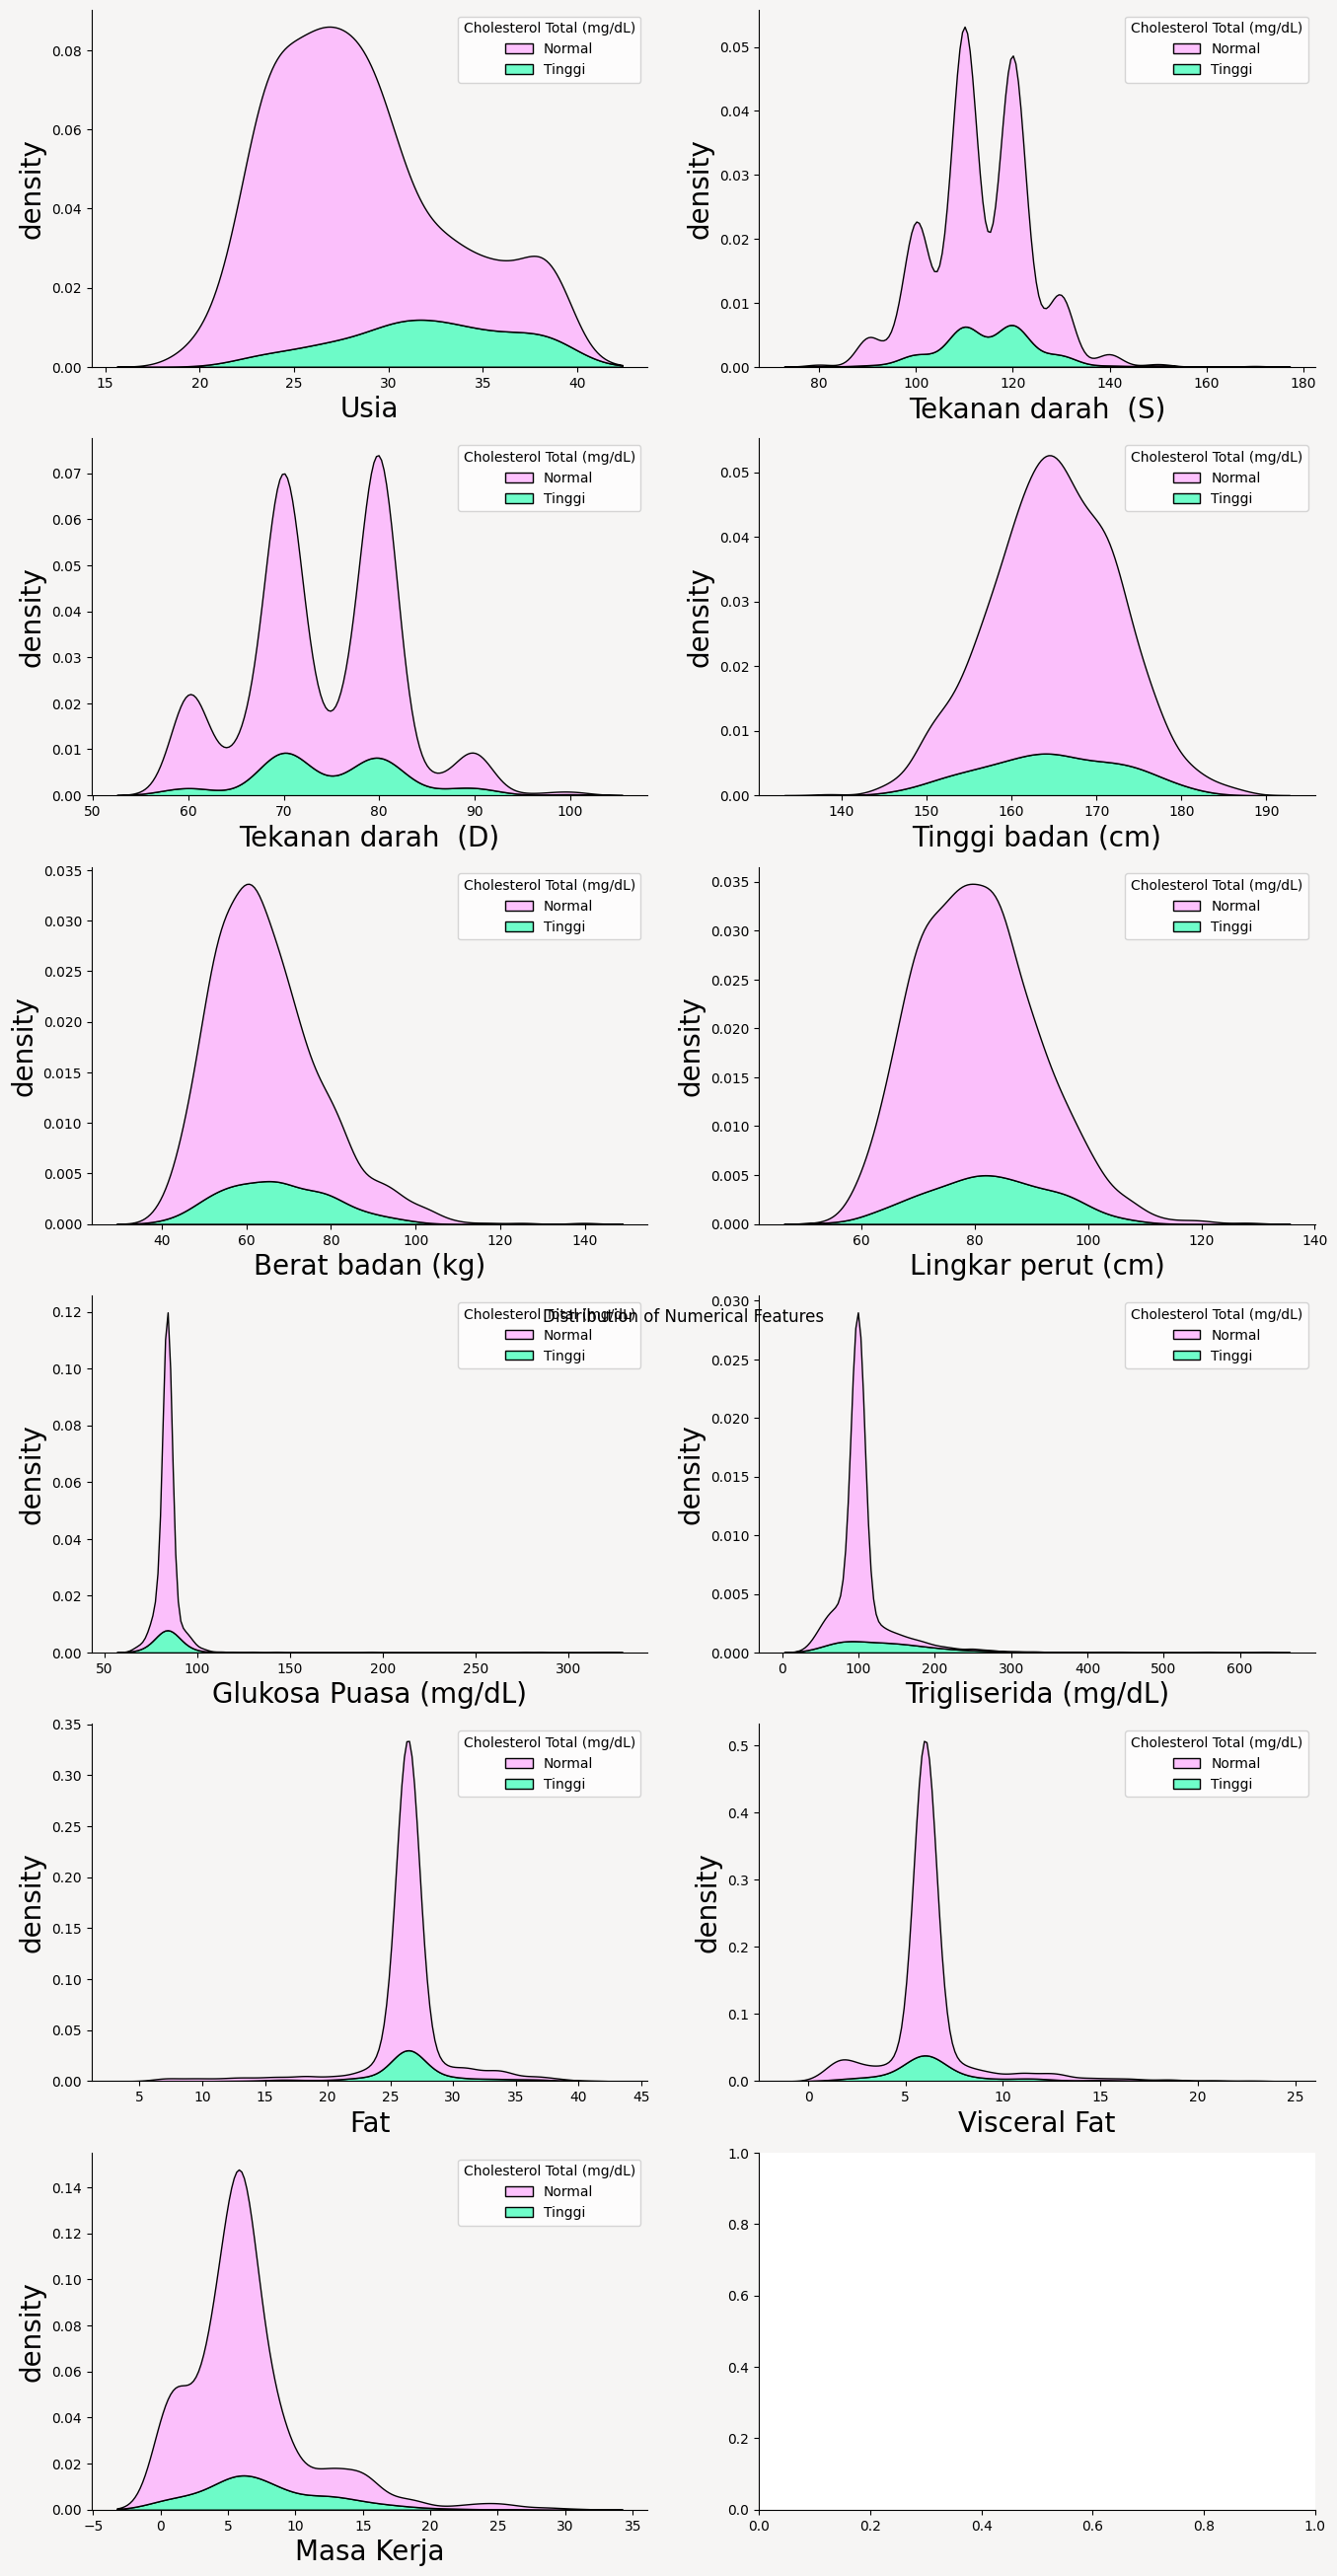

In [124]:
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))
#remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14),facecolor='#F6F5F4')   
fig.subplots_adjust(top=1.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
    
    ax = sns.kdeplot(data=data, x=col, hue="Cholesterol Total (mg/dL)", multiple="stack", palette=mypal[1::4]) 
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    
    if col == 'num_major_vessels':
        sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                      bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
    
    i = i +1
plt.suptitle('Distribution of Numerical Features' ,fontsize = 12);

#### Pair-plots

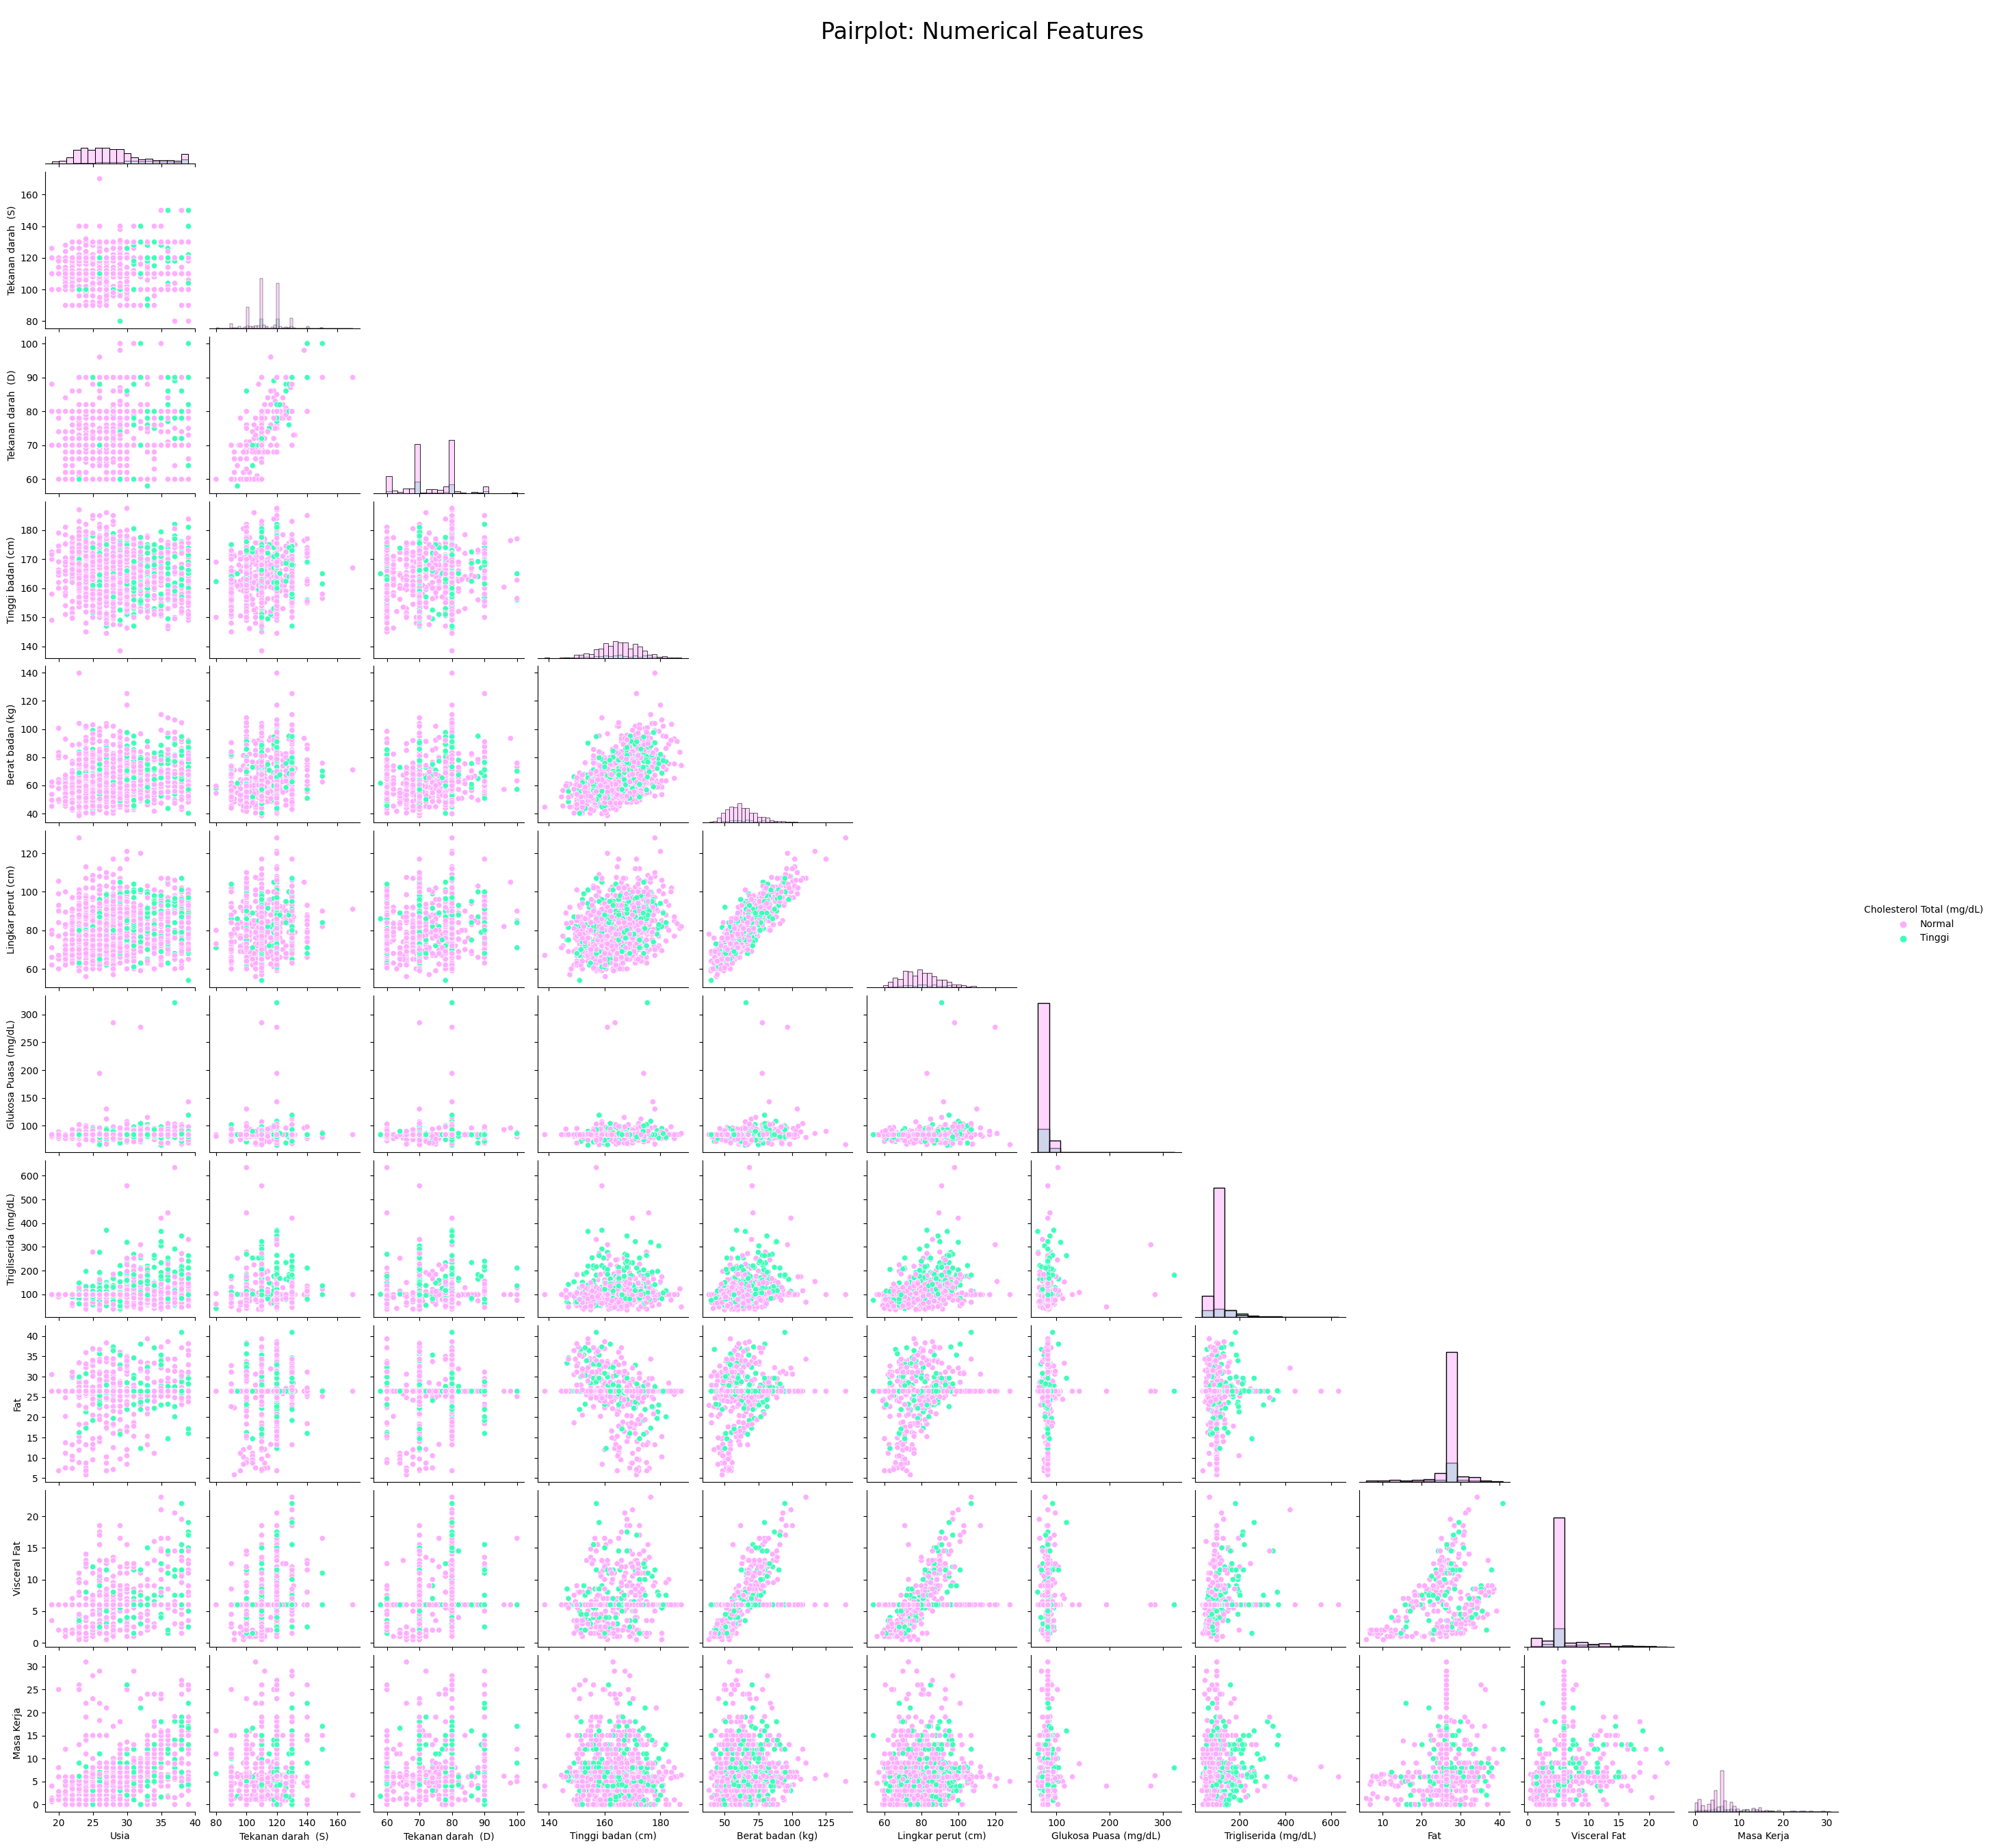

In [125]:
_ = ['Usia','Tekanan darah  (S)', 'Tekanan darah  (D)', 'Tinggi badan (cm)', 'Berat badan (kg)', 'Lingkar perut (cm)', 'Glukosa Puasa (mg/dL)', 'Trigliserida (mg/dL)', 'Fat', 'Visceral Fat', 'Masa Kerja', 'Cholesterol Total (mg/dL)']
data_ = data[_]
g = sns.pairplot(data_, hue="Cholesterol Total (mg/dL)", corner=True, diag_kind='hist', palette=mypal[1::4]);
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24);


#### Indikasi Korelasi

dari reg-plots diatas dapat terlihat ada beberapa kecenderungan linearitas
- Semakin tua usia seseorang, maka masa kerjanya juga cenderung lebih lama
- Semakin tua usia seseorang, maka trigliseridanya juga cenderung lebih tinggi
- Semakin tinggi tekanan darah sistolik, maka tekanan darah diastoliknya juga cenderung lebih tinggi
- Semakin tinggi badannya maka cenderung semakin berat badannya
- Semakin berat badannya atau lingkar perutnya, maka visceral fat dan fatnya cenderung lebih tinggi
- Semakin tinggi visceral fatnya maka semakin tinggi fatnya


<a href="#top">☝️ Back to top</a>    

In [126]:
pulau = {
    'Sumatera': ['Banda Aceh', 'Ujung Padang','Nias','Soposurung','Paya Pasir','Kabanjahe','Tanah Itam Ulu','Medan', 'Pematangsiantar', 'Pangkalan Brandan', 'Sibolga', 'Lhokseumawe','Cupak','Seirampah','Bonjol','Sungai Penuh','Bukit Tinggi','Padang Panjang', 'Bukittinggi', 'Padang','Tanjung Agung','Palembang','Jambi','Ujung Batu','Pekan Baru','Pekanbaru', 'Rengas Pulau','Tanjungpinang','Tanjung Pinang','Batam','Tanjung Karang','Tanjung Gading','Tri Rahayu','Kota Agung','Metro','Kalidadi','Negara Jaya','Liwa','Bumi Dipasena','Teluk Betung', 'B. Lampung', 'Lampung', 'Bandar Lampung', 'Lampung Selatan','Penago II','Bengkulu', 'Tanjung Pandan','Mentok'],
    'Jawa': ['Banten','Pandeglang','Serang', 'Tangerang', 'Tanggerang','Kuningan','Majalengka','Bekasi','Ciamis','Indramayu','Bogor', 'Bandung', 'Cirebon', 'Sumedang', 'Sukabumi', 'Cianjur', 'Garut', 'Depok', 'Cimahi', 'Tasikmalaya', 'Purwakarta', 'Subang', 'Karawang', 'Cibadak','Karanganyar','Kab. Semarang','Sukoharjo','Jepara','Banjarnegara','Kendal','Solo','Grobogan','Ngawi','Bumi Ayu','Banyumas','Purbalingga','Surakarta','Brebes','Boyolali','Purworejo', 'Semarang', 'Magelang', 'Tegal', 'Salatiga', 'Klaten', 'Kebumen', 'Temanggung', 'Pati', 'Wonogiri', 'Wonosobo', 'Pemalang', 'Pekalongan', 'Sragen', 'Cilacap', 'Kudus','Gresik','Pamekasan','Pasuruan','Lamongan','Lumajang','lamongan','Surabaya', 'Malang', 'Sidoarjo', 'Jember', 'Kediri', 'Tulung Agung', 'Madiun', 'Blora', 'Bojonegoro', 'Bondowoso', 'Nganjuk', 'Trenggalek', 'Ponorogo', 'Magetan', 'Jakarta Utara','Jakarta', 'Kota Administrasi Jakarta Pusat', 'Kota Administrasi Jakarta Barat', 'Kota Administrasi Jakarta Selatan', 'Kota Administrasi Jakarta Utara','Gunung Kidul','Srimulyo','Bantul', 'Sleman', 'Gunungkidul', 'Kulon Progo', 'Yogyakarta'],
    'Bali dan Nusa Tenggara': ['Denpasar','Mataram','Quelicai'],
    'Kalimantan': ['Samarinda', 'Balikpapan', 'Balipapan','Banjarmasin', 'Barabai','Singkawang','Pontianak', 'Pemangkat'],
    'Sulawesi': ['Balang Toa','Ujung Pandang', 'Maros','Tana Toraja','Makassar', 'Ujung Baru', 'Sungguminasa', 'Watampone', 'Sosok','Manado','Raha','Toli - Toli','Ambon'],
    'Papua': ['Jayapura', 'Sentani','Manokwari','Dili'],
}
def cari_pulau(daerah):
    for prov, daerah_daerah in pulau.items():
        if daerah.lower() in [x.lower() for x in daerah_daerah]:
            return prov
    return 'Provinsi tidak ditemukan'

daftar_daerah = data['Tempat lahir']
hasil = {}
for daerah in daftar_daerah:
    prov = cari_pulau(daerah)
    hasil.setdefault(prov, []).append(daerah)

In [127]:
data['Pulau'] = data['Tempat lahir'].apply(cari_pulau)

In [128]:
cat_feats

['IMT (kg/m2)',
 'Tempat lahir',
 'Pulau',
 'Jenis Kelamin',
 'Cholesterol Total (mg/dL)']

0

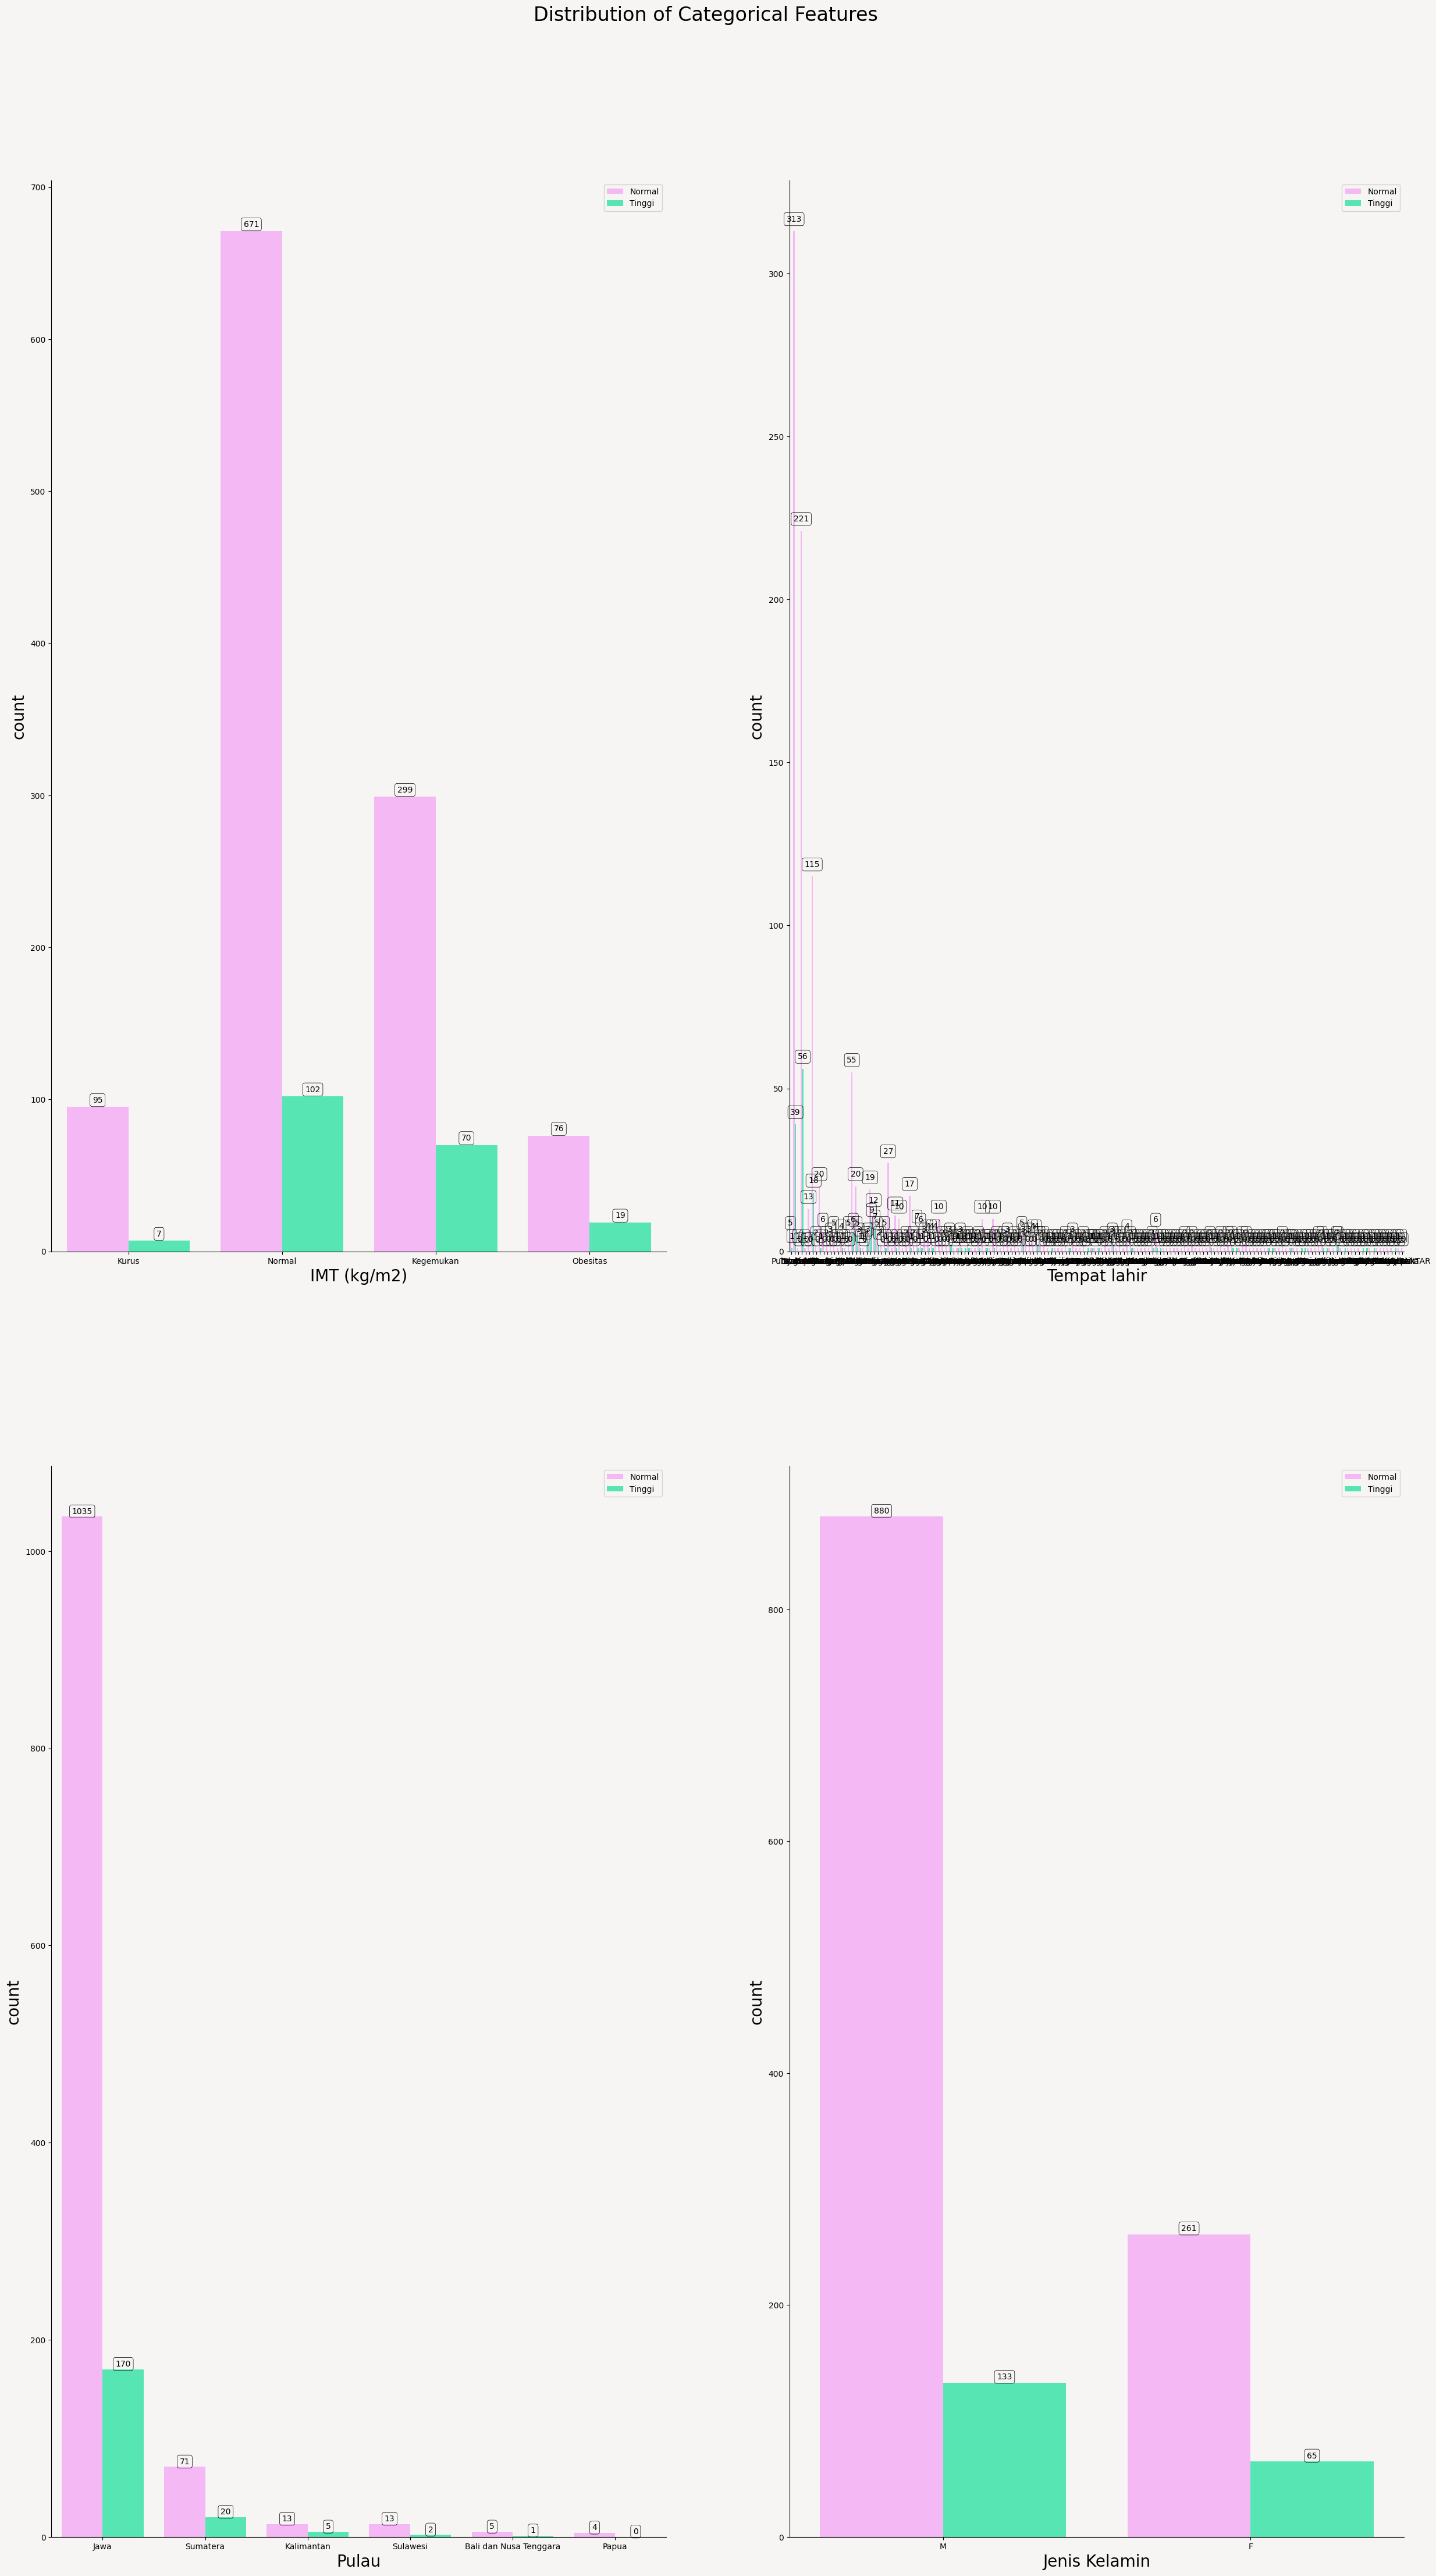

In [129]:
def count_plot(data, cat_feats, ax_width=30, ax_height=50):    
    L = len(cat_feats)
    ncol = 2
    nrow = int(np.ceil(L / ncol))
    remove_last = (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol, figsize=(ax_width, ax_height), facecolor='#F6F5F4')    
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        if col in ['Tempat lahir', 'Pulau']:
            ax = sns.countplot(data=data, x=col, hue="Cholesterol Total (mg/dL)", palette=mypal[1::4])
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Putar label sumbu x
        else:
            ax = sns.countplot(data=data, x=col, hue="Cholesterol Total (mg/dL)", palette=mypal[1::4])
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend(facecolor='#F6F5F4')
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.0f}'.format((height)), ha="center",
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
        i = i + 1

    plt.suptitle('Distribution of Categorical Features', fontsize=24)
    return 0

count_plot(data, cat_feats[0:-1])



### 1.3.3 Categorical Features

                                                                                                                                    
Kita menggunakan count plot untuk memvisualisasikan tiap kategori dan bagaimana hubungannya dengan variabel target. Dua hal yang dapat diperhatikan adalah distribusi dari tiap kategori dalam dataset dan kontribusinya terhadap probabilitas prediksi dari variabel target, yaitu memiliki kolesterol tinggi atau normal. Berikut adalah ringkasan dari categorical features:

<blockquote style="margin-right:auto; margin-left:auto; color:white; background-color: #4e4e4e; padding: 1em; margin:24px;">
   
<ul>
<li> <font color="white" size=+1.0><b>Jenis Kelamin:</b></font>
    <ul>
        <li> Pria memiliki <strong>persentase kolesterol normal lebih tinggi (84.2%) </strong> dibandingkan wanita (77.1%). 
        <li> Wanita memiliki <strong>persentase kolesterol tinggi lebih tinggi (22.9%) </strong> dibandingkan pria (15.8%). Namun secara jumlah pria (133) memiliki jumlah kolesterol lebih banyak daripada wanita (65).
        <li> <strong>Notes:</strong>
            <ul>
                <li> Faktor hormonal dan metabolisme dapat berkontribusi pada perbedaan kadar kolesterol.
                <li>Pria umumnya memiliki kadar LDL ("kolesterol jahat") lebih tinggi dan HDL ("kolesterol baik") lebih rendah dibandingkan wanita.
                 <li> Wanita menopause lebih berisiko tinggi mengalami kolesterol tinggi.
            </ul>
                

    
<li> <font color="white" size=+1.0><b>IMT</b></font>
    <ul>
        <li> Orang kurus memiliki <strong> risiko kolesterol tinggi paling rendah</strong> (6.9%).
        <li> Orang dengan IMT tinggi lebih berisiko tinggi mengalami kolesterol tinggi.
        <li>Lemak berlebih di tubuh dapat meningkatkan produksi kolesterol LDL dan trigliserida.
        
</ul>    

<li> <font color="white" size=+1.0><b>Pulau:</b></font>
    <ul>
    <li> Penduduk di Jawa: Memiliki profil kolesterol terbaik dibandingkan pulau lain.
    <li> Faktor gaya hidup dan pola makan di tiap pulau dapat memengaruhi kadar kolesterol.
     <li> Faktor genetik juga dapat berperan dalam perbedaan regional.
     <li> Penduduk Jawa mungkin memiliki akses lebih baik ke informasi kesehatan dan layanan kesehatan.

</ul>   
    
</ul>                                                                                                                                             
</blockquote>




##  1.4 **Correlation Heatmaps** <a class="anchor" id="1.4"></a>

Correlation heatmap adalah alat yang berguna untuk secara visual menampilkan <strong> hubungan antara dua fitur</strong> dalam sebuah dataset.Dengan kata lain, heatmap ini menunjukkan seberapa kuat dan ke arah mana keterkaitan antara kedua fitur tersebut.

Correlation heatmap menampilkan nilai koefisien korelasi antar fitur dalam bentuk warna. Biasanya, <strong> warna merah</strong> menunjukkan <strong> korelasi positif (nilai satu fitur cenderung naik bersamaan dengan naiknya nilai fitur lain)</strong>, sedangkan <strong>warna biru</strong> menunjukkan <strong>korelasi negatif (nilai satu fitur cenderung turun ketika nilai fitur lain naik)</strong>. Intensitas warna menunjukkan kekuatan hubungan tersebut. <strong>Semakin pekat warnanya, semakin kuat hubungan antar fitur.</strong>.

Nilai koefisien korelasi biasanya berada di antara -1 (korelasi negatif sempurna) dan +1 (korelasi positif sempurna). Sementara itu nilai yang mendekati 0 menunjukkan hubungan yang lemah atau tidak ada hubungan antara kedua fitur.

### 1.4.1 Pearson's correlation 

Koefisien korelasi Pearson adalah statistik yang digunakan untuk mengukur <strong>hubungan linear</strong> antara <strong> dua variabel kontinu.</strong>. Hubungan linear artinya perubahan pada satu variabel berbanding lurus dengan perubahan pada variabel lainnya [[9]](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

Nilai koefisien korelasi Pearson akan selalu berada di antara -1 dan +1.

<li> +1 menunjukkan korelasi positif sempurna. Artinya, jika nilai satu variabel naik, maka nilai variabel lainnya juga akan naik secara proporsional, dan begitu sebaliknya.
<li> -1 menunjukkan korelasi negatif sempurna. Artinya, jika nilai satu variabel naik, maka nilai variabel lainnya akan turun secara proporsional, dan begitu sebaliknya.
<li>Nilai dekat 0 menunjukkan hubungan yang lemah atau tidak ada hubungan sama sekali.
    <ul>


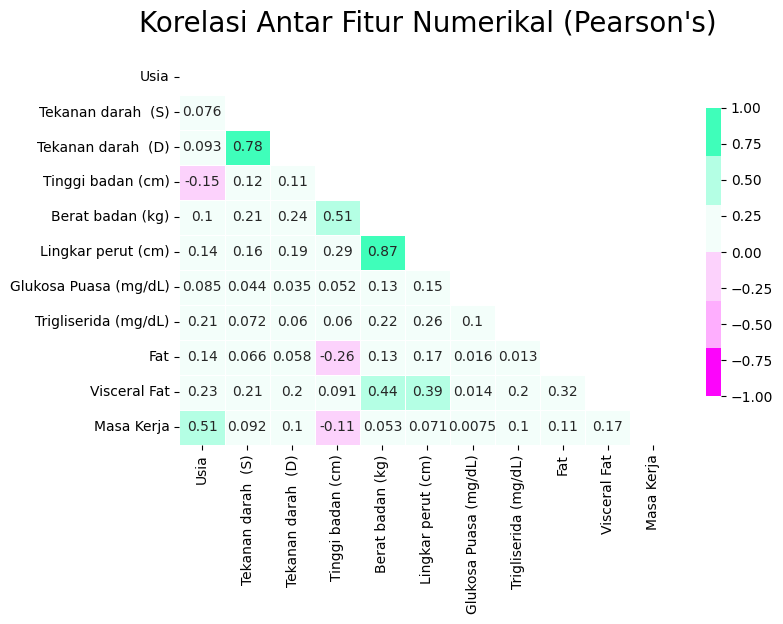

In [130]:
df_ = data[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Korelasi Antar Fitur Numerikal (Pearson's)", fontsize=20, y= 1.05);

Dapat terlihat disini ada beberapa variabel yang perlu diperhatikan karena terindikasi memiliki korelasi yang kuat antar variabel independen (korelasi> 0.5) (<strong> Notes:  Dalam memodelkan harus memenuhi asumsi semua variabel independen saling independen</strong>)

Dapat terlihat disini ada beberapa variabel yang perlu diperhatikan karena terindikasi memiliki korelasi yang kuat antar variabel independen (korelasi> 0.5) (<strong> Notes:  Dalam memodelkan harus memenuhi asumsi semua variabel independen saling independen</strong>)

Adapun variabel yang memiliki indikasi tersebut ialah:
<li> Usia dan Masa Kerja (Korelasi 0,51)
    <ul>

<li> Ada kecenderungan ketika usia naik, masa kerja juga naik, dan sebaliknya.
<li> Hal ini dapat dipahami karena umumnya orang yang lebih tua memiliki pengalaman kerja yang lebih lama. Seiring bertambahnya usia, individu biasanya telah menyelesaikan pendidikan dan memasuki dunia kerja. Semakin lama waktu yang dihabiskan di dunia kerja, maka semakin tinggi pula masa kerja mereka.
<li>Contoh: Seseorang yang berusia 30 tahun mungkin memiliki masa kerja 5 tahun, sedangkan orang yang berusia 50 tahun mungkin memiliki masa kerja 25 tahun.
    </ul>
<li> Tekanan Darah (S) dan Tekanan Darah (D) (Korelasi 0,78)
<ul>
<li>Ada kecenderungan ketika tekanan darah sistolik (S) naik, tekanan darah diastolik (D) juga naik, dan sebaliknya.
<li>Tekanan darah sistolik dan diastolik merupakan dua komponen penting dalam pengukuran tekanan darah. Tekanan darah sistolik mengacu pada tekanan darah saat jantung berkontraksi, sedangkan tekanan darah diastolik mengacu pada tekanan darah saat jantung beristirahat. Kedua komponen ini saling terkait dan seringkali menunjukkan tren yang sama.
<li>Contoh: Seseorang dengan tekanan darah sistolik 140 mmHg dan diastolik 90 mmHg kemungkinan besar akan memiliki tekanan darah sistolik dan diastolik yang naik atau turun bersamaan.
    </ul>
<li> Tinggi Badan dan Berat Badan (Korelasi 0,51)
<ul>
<li> Ada kecenderungan ketika tinggi badan semakin tinggi, berat badan juga naik, dan sebaliknya.
<li> Korelasi ini menunjukkan hubungan positif antara tinggi badan dan berat badan. Orang yang lebih tinggi umumnya memiliki massa otot dan tulang yang lebih banyak, sehingga berat badan mereka juga cenderung lebih tinggi.
<li>Contoh: Seseorang dengan tinggi badan 170 cm mungkin memiliki berat badan 60 kg, sedangkan orang dengan tinggi badan 180 cm mungkin memiliki berat badan 70 kg.
    </ul>
<li>Lingkar Perut dan Berat Badan (Korelasi 0,87)
<ul>
<li> ada kecenderungan ketika berat badan semakin berat, lingkar perut juga semakin lebar, dan sebaliknya.
<li> Korelasi ini menunjukkan hubungan yang kuat antara lingkar perut dan berat badan. Orang dengan berat badan berlebih atau obesitas cenderung memiliki lingkar perut yang lebih besar. Hal ini disebabkan oleh penumpukan lemak di area perut.
<li>Seseorang dengan berat badan 80 kg mungkin memiliki lingkar perut 80 cm, sedangkan orang dengan berat badan 100 kg mungkin memiliki lingkar perut 95 cm.

### 1.4.2 Point biserial correlation
- Korelasi point-biserial digunakan untuk mengukur kekuatan dan arah hubungan antara <strong> satu variabel kontinu </strong>  dengan <strong> satu variabel kategorikal.</strong> Variabel kontinu adalah variabel yang nilainya dapat bervariasi secara kontinu dalam suatu rentang tertentu, seperti tinggi badan, berat badan, atau skor ujian. Sebaliknya, variabel kategorikal hanya memiliki kategori, seperti jenis kelamin (laki-laki/perempuan), lulus/tidak lulus, ya/tidak.

- Korelasi point-biserial bisa dibilang mirip dengan korelasi Pearson yang sering digunakan. Namun, perbedaan mendasarnya yaitu Korelasi Pearson digunakan untuk dua variabel kontinu, sedangkan point-biserial khusus untuk satu kontinu dan satu kategorikal [[10](https://statistics.laerd.com/spss-tutorials/point-biserial-correlation-using-spss-statistics.php)].

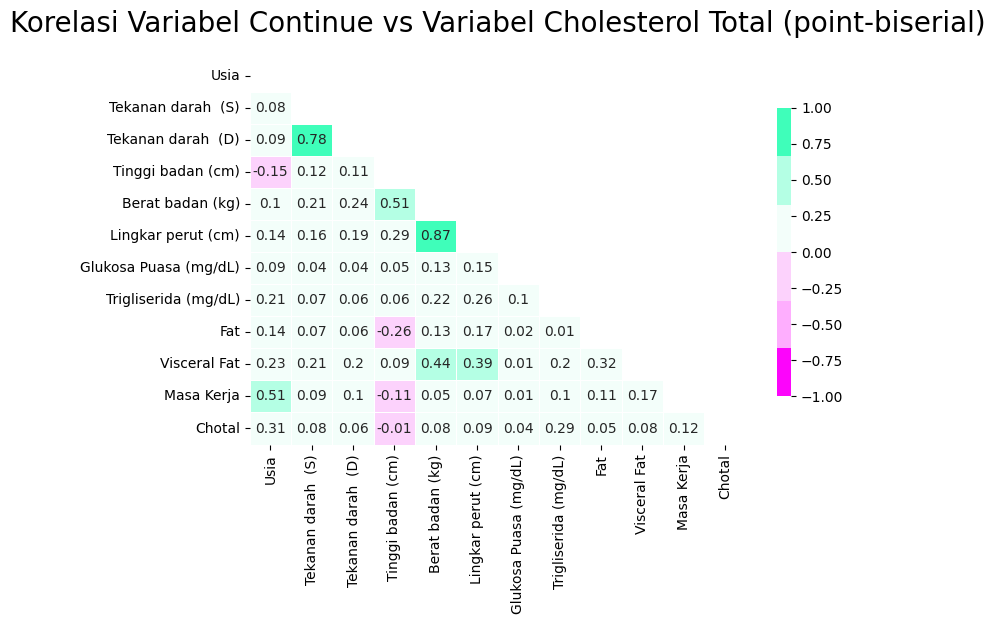

In [131]:
from scipy import stats

data['Chotal'] = data['Cholesterol Total (mg/dL)'].replace({'Tinggi': 1, 'Normal': 0})

feats_ = ['Usia','Tekanan darah  (S)', 'Tekanan darah  (D)', 'Tinggi badan (cm)', 'Berat badan (kg)', 'Lingkar perut (cm)', 'Glukosa Puasa (mg/dL)', 'Trigliserida (mg/dL)', 'Fat', 'Visceral Fat', 'Masa Kerja', 'Chotal']
def point_biserial(x, y):
    pb = stats.pointbiserialr(x, y)
    return pb[0]

rows= []
for x in feats_:
    col = []
    for y in feats_ :
        pbs =point_biserial(data[x], data[y]) 
        col.append(round(pbs,2))  
    rows.append(col)  
    
pbs_results = np.array(rows)
DF = pd.DataFrame(pbs_results, columns = data[feats_].columns, index =data[feats_].columns)

mask = np.triu(np.ones_like(DF, dtype=bool))
corr = DF.mask(mask)

f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Korelasi Variabel Continue vs Variabel Cholesterol Total (point-biserial)", fontsize=20, y= 1.05);

Korelasi ini menunjukkan bagaimana hubungan antara variabel independen numerikal dengan variabel dependen (Cholesterol Total):

Dapat terlihat bahwa <strong> semua variabel</strong> berkorelasi <strong> positif</strong> terhadap Cholesterol Total, kecuali <strong> variabel tinggi badan</strong> yang berkorelasi <strong>negatif.</strong>

### 1.4.3 Cramer's V correlation

* Di dalam statistik, Cramér's V adalah sebuah ukuran statistik untuk mengetahui seberapa kuat hubungan antara **dua variabel kategorik**. Ini didasarkan dari Statistik chi-squared nya pearson dan diperkenalkan oleh Harald Cramér in 1946. [[11](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)].

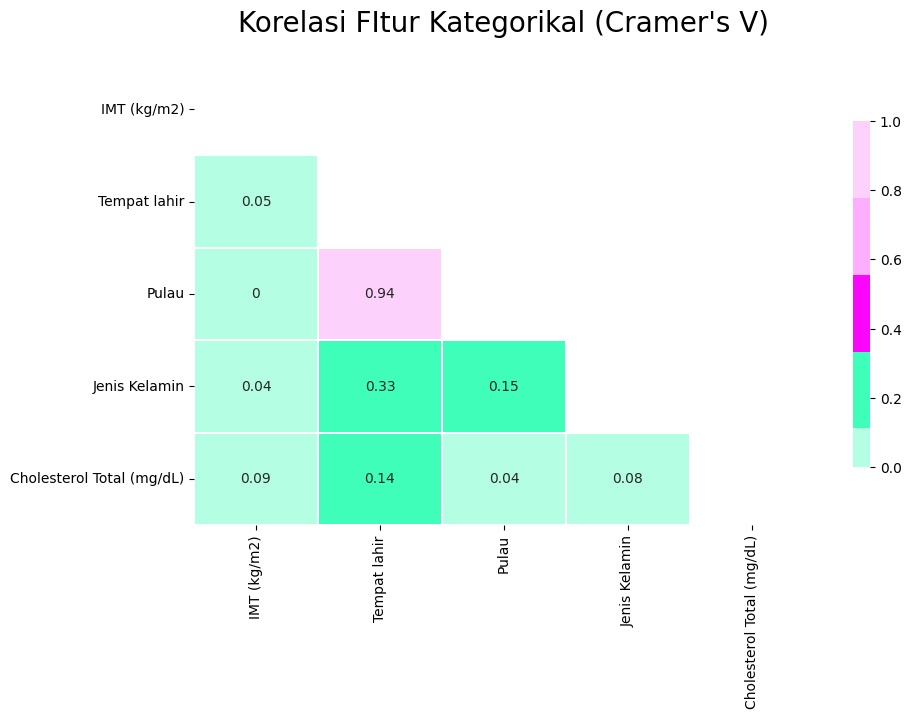

In [132]:
def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

data_ = data[cat_feats]
rows= []
for x in data_:
    col = []
    for y in data_ :
        cramers =cramers_v(data_[x], data_[y]) 
        col.append(round(cramers,2))
    rows.append(col)
    
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_.columns, index = data_.columns)

mypal_1= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA', '#FC05FB', '#FEAEFE', '#FCD2FC']
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)
f, ax = plt.subplots(figsize=(10, 6), facecolor=None)
cmap = sns.color_palette(mypal_1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=0, center=0, annot=True,
            square=False, linewidths=.01, cbar_kws={"shrink": 0.75})
ax.set_title("Korelasi FItur Kategorikal (Cramer's V)", fontsize=20, y= 1.05);

Pada korelasi ini tidak ada indikasi korelasi yang signifikan antar variabel kategorikal, disini yang berkorelasi hanya pulau dengan tempat lahir yang memang diakibatkan karena variabel baru pulau diambil berdasarkan variabel tempat lahir.

<a href="#top">☝️ Back to top</a>    

## **1.5 EDA Summary**: <a class="anchor" id="1.5"></a>

* Ukuran Data: 1339 baris 15 kolom (14 independen + satu variabel target+1 variabel id responden) > Nantinya variabel id akan dihapus dan beberapa kolom juga dihapus, sementara itu untuk menangani imbalance data akan dilakukan oversampling
* Data tidak memiliki missing values
* Tipe data fitur-fitur (kolom):
    * 11 fitur adalah numerikal (int atau float)
    * 4 variabel lainnya merupakan kategorik (termasuk variabel target)
* Variabel target tidak balance perlu penanganan lebih lanjut, 85.2% Normal, 14.8% Tinggi
            

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Responden                  1339 non-null   int64  
 1   Jenis Kelamin              1339 non-null   object 
 2   Usia                       1339 non-null   int64  
 3   Tekanan darah  (S)         1339 non-null   int64  
 4   Tekanan darah  (D)         1339 non-null   int64  
 5   Tinggi badan (cm)          1339 non-null   float64
 6   Berat badan (kg)           1339 non-null   float64
 7   IMT (kg/m2)                1339 non-null   float64
 8   Lingkar perut (cm)         1339 non-null   float64
 9   Glukosa Puasa (mg/dL)      1339 non-null   int64  
 10  Cholesterol Total (mg/dL)  1339 non-null   int64  
 11  Trigliserida (mg/dL)       1339 non-null   int64  
 12  Fat                        1339 non-null   float64
 13  Visceral Fat               1339 non-null   float

---
# 2. **Predictions** <a class="anchor" id="2"></a>
---
## 2.1 **Evaluate Pre-processing** <a class="anchor" id="2.1"></a>

### 2.1.1. **Dropping Some Column**

Disini kita melakukan dropping kolom yang tidak diperlukan karena cenderung akan menghasilkan bias

In [134]:
data = data.drop(columns=['Chotal','Pulau'])

In [135]:
data = data.drop(columns=['Responden'])

karena kolom `Responden` hanya berisi ID Responden dan akan menimbulkan bias dalam perhitungannya maka kolom ini kita drop terlebih dahulu.

### 2.1.2. **Mapping Province**

In [24]:
provinsi = {
    'Aceh': ['Banda Aceh'],
    'Sumatera Utara': ['Ujung Padang','Nias','Soposurung','Paya Pasir','Kabanjahe','Tanah Itam Ulu','Medan', 'Pematangsiantar', 'Pangkalan Brandan', 'Sibolga', 'Lhokseumawe'],
    'Sumatera Barat': ['Cupak','Seirampah','Bonjol','Sungai Penuh','Bukit Tinggi','Padang Panjang', 'Bukittinggi', 'Padang'],
    'Sumatera Selatan': ['Tanjung Agung','Palembang'],
    'Jambi':['Jambi'],
    'Riau': ['Ujung Batu','Pekan Baru','Pekanbaru', 'Rengas Pulau'],
    'KepRi':['Tanjungpinang','Tanjung Pinang','Batam'],
    'Lampung': ['Tanjung Karang','Tanjung Gading','Tri Rahayu','Kota Agung','Metro','Kalidadi','Negara Jaya','Liwa','Bumi Dipasena','Teluk Betung', 'B. Lampung', 'Lampung', 'Bandar Lampung', 'Lampung Selatan'],
    'Bengkulu': ['Penago II','Bengkulu'],
    'Bangka':[ 'Tanjung Pandan','Mentok'],
    'Banten': ['Banten','Pandeglang','Serang', 'Tangerang', 'Tanggerang'],
    'Jawa Barat': ['Kuningan','Majalengka','Bekasi','Ciamis','Indramayu','Bogor', 'Bandung', 'Cirebon', 'Sumedang', 'Sukabumi', 'Cianjur', 'Garut', 'Depok', 'Cimahi', 'Tasikmalaya', 'Purwakarta', 'Subang', 'Karawang', 'Cibadak'],
    'Jawa Tengah': ['Karanganyar','Kab. Semarang','Sukoharjo','Jepara','Banjarnegara','Kendal','Solo','Grobogan','Ngawi','Bumi Ayu','Banyumas','Purbalingga','Surakarta','Brebes','Boyolali','Purworejo', 'Semarang', 'Magelang', 'Tegal', 'Salatiga', 'Klaten', 'Kebumen', 'Temanggung', 'Pati', 'Wonogiri', 'Wonosobo', 'Pemalang', 'Pekalongan', 'Sragen', 'Cilacap', 'Kudus'],
    'Jawa Timur': ['Gresik','Pamekasan','Pasuruan','Lamongan','Lumajang','lamongan','Surabaya', 'Malang', 'Sidoarjo', 'Jember', 'Kediri', 'Tulung Agung', 'Madiun', 'Blora', 'Bojonegoro', 'Bondowoso', 'Nganjuk', 'Trenggalek', 'Ponorogo', 'Magetan'],
    'DKI Jakarta': ['Jakarta Utara','Jakarta', 'Kota Administrasi Jakarta Pusat', 'Kota Administrasi Jakarta Barat', 'Kota Administrasi Jakarta Selatan', 'Kota Administrasi Jakarta Utara'],
    'DI Yogyakarta': ['Gunung Kidul','Srimulyo','Bantul', 'Sleman', 'Gunungkidul', 'Kulon Progo', 'Yogyakarta'],
    'Bali': ['Denpasar'],
    'Nusa Tenggara Barat': ['Mataram'],
    'Nusa Tenggara Timur': ['Quelicai'],
    'Kalimantan Timur': ['Samarinda', 'Balikpapan', 'Balipapan'],
    'Kalimantan Selatan': ['Banjarmasin', 'Barabai'],
    'Kalimantan Barat': ['Singkawang','Pontianak', 'Pemangkat'],
    'Sulawesi Selatan': ['Balang Toa','Ujung Pandang', 'Maros','Tana Toraja','Makassar', 'Ujung Baru', 'Sungguminasa', 'Watampone', 'Sosok'],
    'Sulawesi Utara': ['Manado'],
    'Sulawesi Tenggara':['Raha'],
    'Sulawesi Tengah':['Toli - Toli'],
    'Maluku': ['Ambon'],
    'Papua': ['Jayapura', 'Sentani'],
    'Papua Barat':['Manokwari'],
    'Timor Leste':['Dili'],
}
def cari_provinsi(daerah):
    for prov, daerah_daerah in provinsi.items():
        if daerah.lower() in [x.lower() for x in daerah_daerah]:
            return prov
    return 'Provinsi tidak ditemukan'

daftar_daerah = data['Tempat lahir']
hasil = {}
for daerah in daftar_daerah:
    prov = cari_provinsi(daerah)
    hasil.setdefault(prov, []).append(daerah)

# for prov, daerah_daerah in hasil.items():
#     print(f"{prov}: {daerah_daerah}")


In [25]:
data['Provinsi'] = data['Tempat lahir'].apply(cari_provinsi)

In [26]:
data = data.drop(columns=['Tempat lahir'])

In [139]:
for column in data.select_dtypes(include='object').columns:
    counts = data[column].value_counts()
    print(f"\nJumlah baris per nilai unik dari kolom '{column}':")
    print(counts)


Jumlah baris per nilai unik dari kolom 'Jenis Kelamin':
Jenis Kelamin
M    1013
F     326
Name: count, dtype: int64

Jumlah baris per nilai unik dari kolom 'Cholesterol Total (mg/dL)':
Cholesterol Total (mg/dL)
Normal    1141
Tinggi     198
Name: count, dtype: int64

Jumlah baris per nilai unik dari kolom 'Provinsi':
Provinsi
Jawa Barat             662
DKI Jakarta            283
Jawa Tengah            164
Jawa Timur              63
Sumatera Utara          32
DI Yogyakarta           22
Lampung                 20
Sumatera Barat          11
Banten                  11
Sulawesi Selatan        10
Sumatera Selatan         9
Kalimantan Barat         8
Riau                     7
Kalimantan Timur         7
KepRi                    4
Kalimantan Selatan       3
Nusa Tenggara Barat      3
Bangka                   3
Bengkulu                 3
Sulawesi Utara           2
Papua                    2
Bali                     2
Jambi                    1
Aceh                     1
Nusa Tenggara Timur    

In [27]:
numerical_columns = list(data.loc[:,['Usia', 'Tekanan darah  (S)', 'Tekanan darah  (D)', 'Tinggi badan (cm)', 'Berat badan (kg)','Lingkar perut (cm)','Glukosa Puasa (mg/dL)','Trigliserida (mg/dL)','Fat','Visceral Fat','Masa Kerja']])
categorical_columns = list(data.loc[:,['Cholesterol Total (mg/dL)','Jenis Kelamin', 'Provinsi', 'IMT (kg/m2)']])

<a href="#top">☝️ Back to top</a>    

### 2.1.3 **Remove Outliers (IQR Method)**

**Metode IQR** adalah metode yang digunakan untuk mendeteksi dan menghapus outlier dalam dataset. Outlier adalah nilai data yang jauh lebih tinggi atau lebih rendah daripada nilai lainnya dalam dataset. 

**Langkah-langkah penghapusan outlier dengan metode IQR:**

1. **Hitung kuartil pertama (Q1) dan kuartil ketiga (Q3).**
    * Q1 adalah nilai tengah antara nilai terkecil dan nilai median dataset.
    * Q3 adalah nilai tengah antara nilai median dan nilai terbesar dataset.
2. **Hitung Interquartile Range (IQR).**
    * IQR = Q3 - Q1
3. **Hitung batas bawah dan batas atas outlier.**
    * Batas bawah = Q1 - 1.5 * IQR
    * Batas atas = Q3 + 1.5 * IQR
4. **Identifikasi outlier.**
    * Nilai data yang lebih kecil dari batas bawah atau lebih besar dari batas atas adalah outlier.
5. **Hapus outlier.**

**Contoh:**

Misalkan dataset berikut:

```
1, 2, 3, 4, 5, 6, 7, 8, 9, 100
```

1. **Hitung Q1 dan Q3.**
    * Q1 = (3 + 4) / 2 = 3.5
    * Q3 = (7 + 8) / 2 = 7.5
2. **Hitung IQR.**
    * IQR = 7.5 - 3.5 = 4
3. **Hitung batas bawah dan batas atas outlier.**
    * Batas bawah = 3.5 - 1.5 * 4 = -2
    * Batas atas = 7.5 + 1.5 * 4 = 13
4. **Identifikasi outlier.**
    * Nilai 100 adalah outlier karena lebih besar dari batas atas (13).
5. **Hapus outlier.**
    * Dataset baru: 1, 2, 3, 4, 5, 6, 7, 8, 9

**Kelebihan metode IQR:**

* Mudah digunakan dan diinterpretasikan.
* Tidak terpengaruh oleh nilai outlier.
* Cukup robust terhadap distribusi data yang tidak normal.
[[12]](https://rpubs.com/Dewikin912/Tutorial-Univariate-outliers-metode-IQR-dengan-R)

<strong> Sebelum menghapus Outliers </strong>

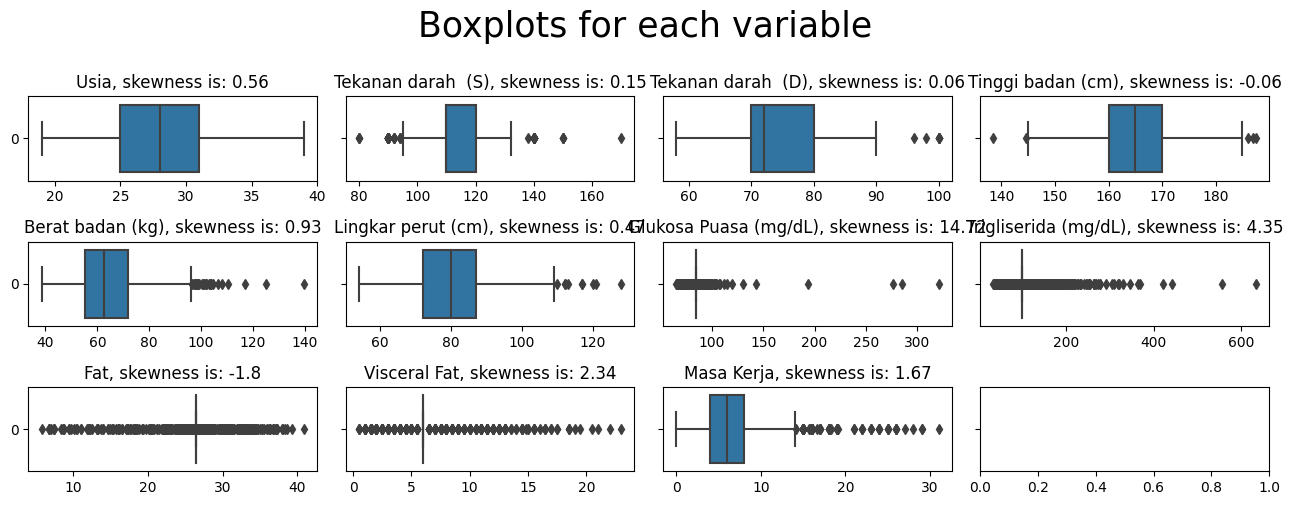

In [28]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=data, columns_list=numerical_columns, rows=3, cols=4, suptitle='Boxplots for each variable')
plt.tight_layout()

Dapat terlihat disini bahwa:
1. Usia memiliki skewness sebesar 0.56, yang menunjukkan distribusi data cenderung condong ke kanan tetapi tidak terlalu ekstrem. Distribusi cenderung normal.
2. Tekanan Darah (S) memiliki skewness sebesar 0.15, yang menunjukkan distribusi data hampir simetris.
3. Tekanan Darah (D) memiliki skewness sebesar 0.06, yang menunjukkan distribusi data hampir simetris.
4. Tinggi Badan memiliki skewness sebesar -0.06, yang menunjukkan distribusi data cenderung condong ke kiri tetapi tidak terlalu ekstrem. Distribusi cenderung normal.
5. Berat Badan memiliki skewness sebesar 0.93, yang menunjukkan distribusi data cenderung condong ke kanan dan mungkin memiliki beberapa outliers di sisi kanan distribusi.
6. IMT (Indeks Massa Tubuh) memiliki skewness sebesar 0.84, yang menunjukkan distribusi data cenderung condong ke kanan dan mungkin memiliki beberapa outliers di sisi kanan distribusi.
7. Lingkar Perut memiliki skewness sebesar 0.93, yang menunjukkan distribusi data cenderung condong ke kanan dan memiliki beberapa outliers di sisi kanan distribusi.
8. Glukosa Puasa memiliki skewness sebesar 14.72, yang menunjukkan distribusi data sangat condong ke kanan dan mungkin memiliki banyak outliers di sisi kanan distribusi.
9. Trigliserida memiliki skewness sebesar 4.35, yang menunjukkan distribusi data sangat condong ke kanan dan memiliki banyak outliers di sisi kanan distribusi.
10. Fat memiliki skewness sebesar -1.8, yang menunjukkan distribusi data cenderung condong ke kiri dan memiliki beberapa outliers di sisi kiri distribusi.
11. Visceral Fat memiliki skewness sebesar 2.34, yang menunjukkan distribusi data sangat condong ke kanan dan memiliki beberapa outliers di sisi kanan distribusi.
12. Masa Kerja memiliki skewness sebesar 1.67, yang menunjukkan distribusi data cenderung condong ke kanan dan memiliki beberapa outliers di sisi kanan distribusi.

In [29]:
def IQR_method (df,n,features):
    outlier_list = []
    
    for column in features:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        outlier_list.extend(outlier_list_column)
        
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [30]:
Outliers_IQR = IQR_method(data,1,numerical_columns)

df = data.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 91


<strong> Sesudah menghapus Outliers </strong>

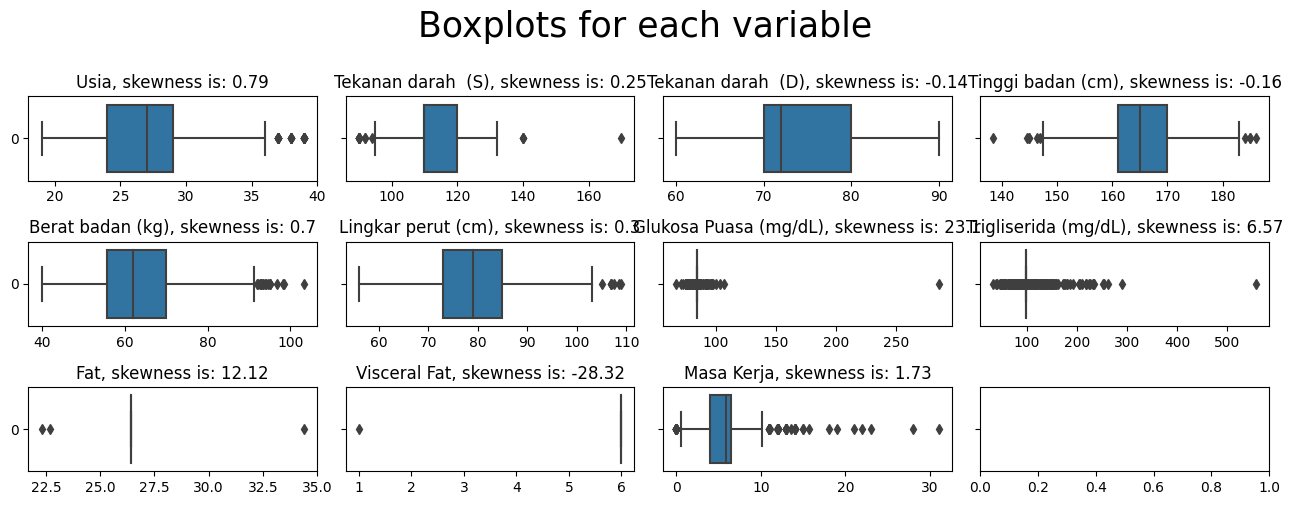

In [31]:
boxplots_custom(dataset=df, columns_list=numerical_columns, rows=3, cols=4, suptitle='Boxplots for each variable')
plt.tight_layout()

<a href="#top">☝️ Back to top</a>    

In [32]:
df = pd.get_dummies(df, drop_first=True)

In [33]:
X = df.drop('Cholesterol Total (mg/dL)_Tinggi', axis=1)
y = df['Cholesterol Total (mg/dL)_Tinggi']

### 2.1.4 **SMOTE OVERSAMPLING**

In [34]:
def oversamp(df):
    high = df[df['Cholesterol Total (mg/dL)_Tinggi'] == 1]
    non_high = df[df['Cholesterol Total (mg/dL)_Tinggi'] == 0]
    print(len(high))
    print(len(non_high))
    oversampled = high.sample(len(non_high),replace = True)
    df = pd.concat([non_high,oversampled])
    return df

df = oversamp(df)

65
737


In [35]:
def Smote_oversample(data):
    data_no_nan = data.dropna()

    smote = SMOTE(sampling_strategy='minority')
    X_resampled, y_resampled = smote.fit_resample(X, y)

    return X_resampled, y_resampled

X,y = Smote_oversample(df)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

<a href="#top">☝️ Back to top</a>    

### 2.1.4 **STANDARDIZE**

Standardisasi adalah proses transformasi data numerik ke skala standar. Skala standar ini biasanya memiliki mean (rata-rata) 0 dan standard deviation (deviasi standar) 1.

Manfaat Standardisasi:

* Memperbaiki performa algoritma machine learning: Banyak algoritma machine learning berasumsi bahwa fitur-fitur berada pada skala yang sama. Standardisasi memastikan semua fitur berada pada skala yang sama, sehingga algoritma dapat fokus pada pola dan hubungan antara fitur, bukan pada skalanya.
* Meningkatkan kecepatan konvergensi: Beberapa algoritma machine learning, seperti gradient descent, bekerja lebih efisien ketika fitur-fitur terstandarisasi. Ini karena proses update parameter algoritma menjadi lebih stabil dan konvergensi menuju solusi optimal bisa lebih cepat tercapai.
* Mencegah dominasi fitur dengan skala besar: Tanpa standardisasi, fitur dengan skala yang lebih besar dapat mendominasi algoritma dan memengaruhi hasil akhir. Standardisasi mencegah hal ini terjadi dengan menempatkan semua fitur pada skala yang sama.[[17]](https://ejurnal.stmik-budidarma.ac.id/index.php/mib/article/viewFile/6856/3676#:~:text=Proses%20Standar%20Scaler%20dalam%20penelitian,meningkatkan%20akurasi%20algoritma%20pemrosesan%20data.)

In [37]:
from sklearn.preprocessing import StandardScaler

def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [38]:
col_names = numerical_columns
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031 entries, 1099 to 1126
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Usia                          1031 non-null   float64
 1   Tekanan darah  (S)            1031 non-null   float64
 2   Tekanan darah  (D)            1031 non-null   float64
 3   Tinggi badan (cm)             1031 non-null   float64
 4   Berat badan (kg)              1031 non-null   float64
 5   Lingkar perut (cm)            1031 non-null   float64
 6   Glukosa Puasa (mg/dL)         1031 non-null   float64
 7   Trigliserida (mg/dL)          1031 non-null   float64
 8   Fat                           1031 non-null   float64
 9   Visceral Fat                  1031 non-null   float64
 10  Masa Kerja                    1031 non-null   float64
 11  Jenis Kelamin_M               1031 non-null   bool   
 12  IMT (kg/m2)_Normal            1031 non-null   bool   
 13  IMT (

<a href="#top">☝️ Back to top</a>    

## 2.2 **Evaluating Feature Selection** <a class="anchor" id="2.2"></a>


<strong> ini adalah model awal setelah di preprocessing tanpa adanya feature selection.

In [47]:
estimator = []
estimator.append(('Neural Network', MLPClassifier(max_iter = 10000) ))
estimator.append(('LogisticRegression', LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 200)))
estimator.append(('ExtraTreesClassifier', ExtraTreesClassifier() ))
estimator.append(('RandomForest', RandomForestClassifier() ))
estimator.append(('KNN', KNeighborsClassifier() ))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('AdaBoostClassifier', AdaBoostClassifier() ))
estimator.append(('GradientBoostingClassifier', GradientBoostingClassifier() ))
estimator.append(('XGB', XGBClassifier() ))
estimator.append(('CatBoost', CatBoostClassifier(logging_level='Silent') ))

In [50]:
predictions_df = pd.DataFrame()
predictions_df['action'] = y_test

for name, classifier in estimator:
    classifier.fit(X_train, y_train.ravel())
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions

    f1 = f1_score(y_test, predictions, average='weighted')
    print(f"{name}: F1-score (weighted) = {f1:.4f}")


Neural Network: F1-score (weighted) = 0.9639
LogisticRegression: F1-score (weighted) = 0.9277
ExtraTreesClassifier: F1-score (weighted) = 0.9661
RandomForest: F1-score (weighted) = 0.9616
KNN: F1-score (weighted) = 0.9616
SVC: F1-score (weighted) = 0.9120
AdaBoostClassifier: F1-score (weighted) = 0.9139
GradientBoostingClassifier: F1-score (weighted) = 0.8789
XGB: F1-score (weighted) = 0.8698
CatBoost: F1-score (weighted) = 0.9639


<strong> Disini kita mencoba ``mengevaluasi model``, karena ada beberapa indikasi korelasi pada tahapan sebelumnya maka kita akan melakukan dropping beberapa fitur dan mencoba melakukan modelling</strong>

<a href="#top">☝️ Back to top</a>    

In [43]:
X_train1=X_train.drop(columns=['Tekanan darah  (D)', 'Tinggi badan (cm)', 'Berat badan (kg)', 'Visceral Fat', 'Masa Kerja'])
X_test1=X_test.drop(columns=['Tekanan darah  (D)', 'Tinggi badan (cm)', 'Berat badan (kg)', 'Visceral Fat', 'Masa Kerja'])

In [49]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031 entries, 1099 to 1126
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Usia                          1031 non-null   float64
 1   Tekanan darah  (S)            1031 non-null   float64
 2   Lingkar perut (cm)            1031 non-null   float64
 3   Glukosa Puasa (mg/dL)         1031 non-null   float64
 4   Trigliserida (mg/dL)          1031 non-null   float64
 5   Fat                           1031 non-null   float64
 6   Jenis Kelamin_M               1031 non-null   bool   
 7   IMT (kg/m2)_Normal            1031 non-null   bool   
 8   IMT (kg/m2)_Kegemukan         1031 non-null   bool   
 9   IMT (kg/m2)_Obesitas          1031 non-null   bool   
 10  Provinsi_Banten               1031 non-null   bool   
 11  Provinsi_Bengkulu             1031 non-null   bool   
 12  Provinsi_DI Yogyakarta        1031 non-null   bool   
 13  Provi

In [48]:
predictions_df = pd.DataFrame()
predictions_df['action'] = y_test

for name, classifier in estimator:
    classifier.fit(X_train1, y_train.ravel())
    predictions = classifier.predict(X_test1)
    predictions_df[name.strip(" :")] = predictions

    f1 = f1_score(y_test, predictions, average='weighted')
    print(f"{name}: F1-score (weighted) = {f1:.4f}")


Neural Network: F1-score (weighted) = 0.9481
LogisticRegression: F1-score (weighted) = 0.9277
ExtraTreesClassifier: F1-score (weighted) = 0.9661
RandomForest: F1-score (weighted) = 0.9639
KNN: F1-score (weighted) = 0.9458
SVC: F1-score (weighted) = 0.9142
AdaBoostClassifier: F1-score (weighted) = 0.9137
GradientBoostingClassifier: F1-score (weighted) = 0.8814
XGB: F1-score (weighted) = 0.8673
CatBoost: F1-score (weighted) = 0.9661


Dapat terlihat bahwa ada penurunan **explainablity** dari model jika kita mengurangi fitur. hal ini adalah bukti bahwa ada indikasi: 
<li> Meskipun variabel mungkin berkorelasi, <strong>setiap variabel</strong> dapat memberikan <strong> informasi yang unik</strong> terkait dengan target klasifikasi. Mereka dapat memberikan informasi yang berbeda dan independen untuk klasifikasi. Menghapus variabel berkorelasi dapat menyebabkan hilangnya informasi yang berharga dan menurunkan akurasi model. Misalnya, meskipun usia dan masa kerja berkorelasi, keduanya masih dapat memberikan wawasan yang berbeda terkait dengan pengalaman atau faktor-faktor lain yang dapat mempengaruhi hasil klasifikasi. Dengan mempertahankan kedua variabel ini dalam model, kita dapat menangkap informasi yang relevan dari masing-masing.

<li> Algoritma Trees Decision atau ensambel seperti ExtraTreesClassifier, secara alami dapat menangani korelasi antara variabel. Model-model ini <strong> tidak dipengaruhi oleh korelasi antar variabel</strong> dan <strong>dapat melakukan pemisahan fitur-fitur yang saling berkaitan</strong> untuk meningkatkan akurasi prediksi.

<li> Menghilangkan variabel yang berkorelasi kuat secara berlebihan dapat <strong>mengurangi jumlah informasi yang tersedia untuk model</strong> . Hal ini dapat mengakibatkan pengurangan dalam keakuratan dan performa model, terutama jika variabel tersebut memuat informasi yang penting untuk memprediksi target klasifikasi.

<li> Variabel yang berkorelasi kuat sering kali memiliki <strong>konteks atau interpretasi yang berbeda</strong> dalam konteks masalah yang dihadapi. Misalnya, meskipun tinggi badan dan berat badan berkorelasi, keduanya dapat memberikan pandangan yang berbeda terkait dengan karakteristik fisik individu dan pengaruhnya terhadap target klasifikasi. Bisa jadi seseorang itu tinggi namun seperti artis korea yang menjaga berat badannya misalnya yoona SNSD memiliki berat badan 170 dengan berat badan 42 kg atau seperti model-model. Nah ada juga seperti atlit sumo misalnya yang memiliki berat badan yang sama tetapi beratnya mungkin 70 kg [18] [19] [20]

<a href="#top">☝️ Back to top</a>    

## 2.3 **Best Model** <a class="anchor" id="2.3"></a>

In [45]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [46]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

In [168]:
estimator = []
estimator.append(('Neural Network', MLPClassifier(max_iter = 10000) ))
estimator.append(('LogisticRegression', LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 200)))
estimator.append(('ExtraTreesClassifier', ExtraTreesClassifier() ))
estimator.append(('RandomForest', RandomForestClassifier() ))
estimator.append(('KNN', KNeighborsClassifier() ))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('AdaBoostClassifier', AdaBoostClassifier() ))
estimator.append(('GradientBoostingClassifier', GradientBoostingClassifier() ))
estimator.append(('XGB', XGBClassifier() ))
estimator.append(('CatBoost', CatBoostClassifier(logging_level='Silent') ))

In [169]:
predictions_df = pd.DataFrame()
predictions_df['action'] = y_test

for name, classifier in estimator:
    classifier.fit(X_train, y_train.ravel())
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions

    f1 = f1_score(y_test, predictions, average='weighted')
    print(f"{name}: F1-score (weighted) = {f1:.4f}")


Neural Network: F1-score (weighted) = 0.9729
LogisticRegression: F1-score (weighted) = 0.9345
ExtraTreesClassifier: F1-score (weighted) = 0.9774
RandomForest: F1-score (weighted) = 0.9684
KNN: F1-score (weighted) = 0.9525
SVC: F1-score (weighted) = 0.9300
AdaBoostClassifier: F1-score (weighted) = 0.9162
GradientBoostingClassifier: F1-score (weighted) = 0.8997
XGB: F1-score (weighted) = 0.9136
CatBoost: F1-score (weighted) = 0.9706


berdasarkan hasil percobaan yang dilakukan, model terbaik untuk task klasifikasi ini adalah <strong> ExtraTreesClassifier dengan F1-score (weighted)</strong> sebesar <strong> 0.9774</strong>.

ExtraTreesClassifier memiliki performa yang lebih baik dibandingkan model lain karena memiliki F1-score tertinggi. F1-score merupakan metrik yang menggabungkan precision dan recall, sehingga nilai yang lebih tinggi menunjukkan kemampuan model yang lebih baik dalam mengidentifikasi kelas positif dan negatif secara akurat.

Meskipun model lain seperti CatBoost (0.9706) dan Neural Network (0.9729) memiliki F1-score yang mendekati performa ExtraTreesClassifier, selisih yang kecil antar model tersebut mungkin tidak signifikan secara statistik. Model-model ini nantinya akan kita gunakan untuk voting dengan harapan dapat mendapatkan akurasi yang lebih baik lagi.

<a href="#top">☝️ Back to top</a>    

## 2.4 **Hyperparameter Tuning** <a class="anchor" id="2.4"></a>

Kita telah memilih model terbaik, yaitu model Extratrees. Namun, pemilihan ini didasarkan pada parameter default. Intuisi kita mengatakan bahwa performa model bisa ditingkatkan lagi dengan tuning parameter.  Mari kita lihat apakah mungkin untuk mencapai peningkatan tersebut menggunakan algoritma GridSearch.

In [183]:
xtrees = ExtraTreesClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],   
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]       
}
grid_search = GridSearchCV(estimator=xtrees, param_grid=param_grid, 
                           scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
              precision    recall  f1-score   support

       False       0.98      0.99      0.98       218
        True       0.99      0.98      0.98       225

    accuracy                           0.98       443
   macro avg       0.98      0.98      0.98       443
weighted avg       0.98      0.98      0.98       443



<a href="#top">☝️ Back to top</a>    

## 2.5 **Performance Metric** <a class="anchor" id="2.5"></a>

### 2.1.1 Performance metric

Terdapat beberapa metrik yang dapat digunakan untuk menilai kinerja suatu algoritma klasifikasi tertentu. Pemilihan metrik yang ``tepat`` bergantung pada jenis masalah yang sedang kita hadapi. Ada kasus di mana, misalnya, akurasi bisa menjadi pilihan yang tepat dan dalam beberapa kasus lain, *recall* atau *precision* bisa lebih sesuai dengan tujuannya. Karena kita sedang menangani kasus medis (mengklasifikasikan apakah suatu kasus menyebabkan kolesterol tinggi atau normal), kita bisa menggunakan recall (tingkat positif benar atau sensitivitas) sebagai metrik kinerja untuk memilih klasifier kita. Perlu dicatat di sini bahwa kita tidak ingin mengklasifikasikan kasus positif (kolesterol tinggi) sebagai negatif (kolestrol normal) [21][22][23][24].

**Confusion matrix** : A confusion matrix (atau disebut juga sebagai matriks kesalahan) adalah format tabel khusus yang memungkinkan visualisasi performa algoritma supervised learning. Setiap baris dalam matriks mewakili contoh-contoh di kelas aktual, sedangkan setiap kolom mewakili contoh-contoh di kelas prediksi. Tabel di bawah ini adalah contoh confusion matrix untuk klasifikasi biner, di mana kita bisa mendapatkan terminologi dan metrik lainnya.

<div>    
<img src="https://miro.medium.com/max/875/1*LQ1YMKBlbDhH9K6Ujz8QTw.jpeg" width="350", align="center"/>  
</div>

[Image credit >>](https://towardsdatascience.com/demystifying-confusion-matrix-29f3037b0cfa)

---

**Key**: 

|**Term** |**Meaning** | **Descriptions**| 
| --- |---|---|
|TP |True Positive|Kasus positif terprediksi positif|
|FP |False Positive|Kasus negatif terprediksi positif|
|TN |True Negative|Kasus negatif terprediiksi negatif|
|FN |False Negative|Kasus positif terprediksi negatif|

---
**Accuracy** : Akurasi mengukur seberapa banyak kasus yang diidentifikasi/diprediksi dengan benar oleh model, yaitu jumlah prediksi yang benar dibagi dengan total ukuran sampel.

$\frac{TP + TN}{TP +TN + FP + FN}$

**Recall**: Recall mengukur tingkat positif sebenarnya, yaitu berapa banyak kasus positif yang sebenarnya diidentifikasi/diprediksi sebagai positif oleh mod

$\frac{TP}{(TP + FN)}$

**Precision**: Presisi mengukur berapa banyak kasus yang diprediksi sebagai positif yang sebenarnya positif.

$\frac{TP}{(TP + FP)}$

**F1-Score** : F1-Score menggabungkan presisi dan recall dari model dan didefinisikan sebagai nilai rata-rata harmonik dari presisi dan recall.

$2\frac{recall * precision}{recall + precision}$

<a href="#top">☝️ Back to top</a>

### 2.1.2 Performance metric pada model

<li> <strong> Akurasi:</strong> Akurasi model secara keseluruhan adalah <strong> 0.98</strong>, yang berarti model ini memprediksi dengan benar 98% dari data dan model dapat menjelaskan 98% dari data dan 2% lainnya dijelaskan oleh vaktor lain. Ini merupakan indikasi yang baik bahwa model dapat membedakan antar kelas dengan baik.
<li> <strong> Precision dan Recall:</strong> Nilai yang tinggi pada kedua metrik ini untuk masing-masing kelas (positif dan negatif) menunjukkan keseimbangan yang baik antara kemampuan model mengidentifikasi benar positif (precision) dan menghindari kesalahan klasifikasi negatif sebagai positif (recall). Nilai precision dan recall yang mendekati 1 menunjukkan performa yang baik.
    <ul>
<li>Precision: Nilai precision untuk kedua kelas <strong> (False: 0.98 dan True: 0.99)</strong> mendekati 1. Hal ini menunjukkan bahwa sebagian besar instance yang diprediksi model sebagai positif (memiliki penyakit) benar-benar positif.
    <li> Recall: Nilai recall untuk kedua kelas <strong>(False: 0.99 dan True: 0.98)</strong> juga mendekati 1. Ini menunjukkan bahwa model berhasil mengidentifikasi sebagian besar instance positif (memiliki penyakit) dari data.
    </ul>
<li> <strong> F1-score: </strong>F1-score untuk kedua kelas <strong>(0.98)</strong> juga mendekati 1. F1-score menggabungkan precision dan recall, sehingga nilai tinggi menunjukkan keseimbangan yang baik antara keduanya.

<a href="#top">☝️ Back to top</a>    

## 2.6 **Model Explainablity** <a class="anchor" id="2.5"></a>

Salah satu tantangan dalam project machine learning adalah menjelaskan prediksi model. Sebuah model mungkin menganggap beberapa fitur lebih penting daripada yang lain untuk prediksinya. Model lain mungkin memberikan bobot yang lebih tinggi pada fitur lain. **Permutation importance** dan **SHAP** adalah dua metode yang dapat digunakan untuk memahami fitur mana yang dipilih untuk memiliki dampak terbesar pada prediksi model kita.

### 2.6.1 Permutation importance: 

Permutation importance didefinisikan sebagai **penurunan nilai model** ketika **nilai fitur tunggal** *randomly shuffled*. Prosedur ini memutuskan hubungan antara fitur dan target, sehingga penurunan nilai model mengindikasikan seberapa bergantungnya model pada fitur tersebut [[25]](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html). Dengan kata lain, permutation importance memberi tahu kita fitur mana yang memiliki dampak terbesar pada prediksi model kita.

In [187]:
import eli5
from eli5.sklearn import PermutationImportance

perm_imp = PermutationImportance(best_model, random_state=42).fit(X_train, y_train)
eli5.show_weights(perm_imp, feature_names = X_test.columns.tolist())

Weight,Feature
0.1003 ± 0.0146,IMT (kg/m2)_Kegemukan
0.0733 ± 0.0127,Provinsi_DKI Jakarta
0.0679 ± 0.0051,Provinsi_Jawa Timur
0.0658 ± 0.0064,Provinsi_Jawa Tengah
0.0625 ± 0.0122,IMT (kg/m2)_Normal
0.0388 ± 0.0051,Trigliserida (mg/dL)
0.0266 ± 0.0054,Provinsi_Jawa Barat
0.0109 ± 0.0015,Provinsi_Kalimantan Barat
0.0105 ± 0.0082,Usia
0.0095 ± 0.0015,Masa Kerja


1. Fitur Penting:

* IMT (kg/m²) Kegemukan: Memiliki nilai <strong> importance tertinggi (0.1003 ± 0.0146)</strong>, menunjukkan bahwa <strong> fitur ini paling berpengaruh</strong> terhadap prediksi. Orang dengan IMT kategori kegemukan memiliki risiko lebih tinggi pada variabel yang diprediksi.
* Provinsi_DKI Jakarta: Memiliki nilai <strong> importance yang tinggi (0.0733 ± 0.0127)</strong>, menunjukkan bahwa lokasi di DKI Jakarta memiliki pengaruh signifikan terhadap prediksi. Faktor-faktor di DKI Jakarta, seperti gaya hidup, akses ke layanan kesehatan, dan polusi udara, mungkin berkontribusi terhadap variabel yang diprediksi.
* Provinsi_Jawa Timur, Provinsi_Jawa Tengah, dan Provinsi_Jawa Barat: Memiliki nilai <strong>importance yang relatif tinggi (0.0658 - 0.0679)</strong>, menunjukkan bahwa lokasi di Jawa Timur, Jawa Tengah, dan Jawa Barat juga memiliki pengaruh terhadap prediksi. Faktor-faktor di Jawa, seperti pola makan, tingkat aktivitas fisik, dan akses ke layanan kesehatan, mungkin berkontribusi terhadap variabel yang diprediksi.
* Fitur Lainnya: Memiliki nilai importance yang lebih rendah, menunjukkan pengaruh yang lebih kecil terhadap prediksi.
2. Interpretasi Nilai Importance:

* Nilai importance menunjukkan rata-rata pengaruh fitur terhadap prediksi.
* Semakin tinggi nilai importance, semakin besar pengaruh fitur tersebut.
* Nilai standar deviasi menunjukkan variasi pengaruh fitur.
* Nilai standar deviasi yang kecil menunjukkan pengaruh fitur yang relatif konsisten.
3. Kesimpulan:

* Hasil permutation importance menunjukkan bahwa IMT, lokasi, dan beberapa faktor lainnya berperan penting dalam prediksi.

<a href="#top">☝️ Back to top</a>    

### 2.6.2 SHAP:

SHAP singkatan dari **SH**apely **A**dditive Ex**P**lanations, adalah sebuah metode yang digunakan untuk menjelaskan output dari sebuah model machine learning. MMetode SHAP memungkinkan kita untuk mengerti bagaimana setiap fitur mempengaruhi hasil prediksi dari model kita. Ini mirip dengan memberikan "nilai penting" kepada setiap fitur berdasarkan kontribusinya terhadap prediksi.

Dengan menggunakan nilai Shapley dari teori permainan, SHAP memberikan penjelasan yang jelas dan terukur mengenai kontribusi setiap fitur terhadap hasil prediksi. Ini membantu kita untuk memahami dan menjelaskan cara kerja model pembelajaran mesin secara lebih mendalam [5]. SHAP memiliki beragam fungsi (metode) di mana kita dapat memvisualisasikan/menginterpretasikan output dari model kita. Di bawah ini, kita menggunakan ``shap.summary_plot()`` untuk mengidentifikasi dampak setiap fitur terhadap output yang diprediksi.

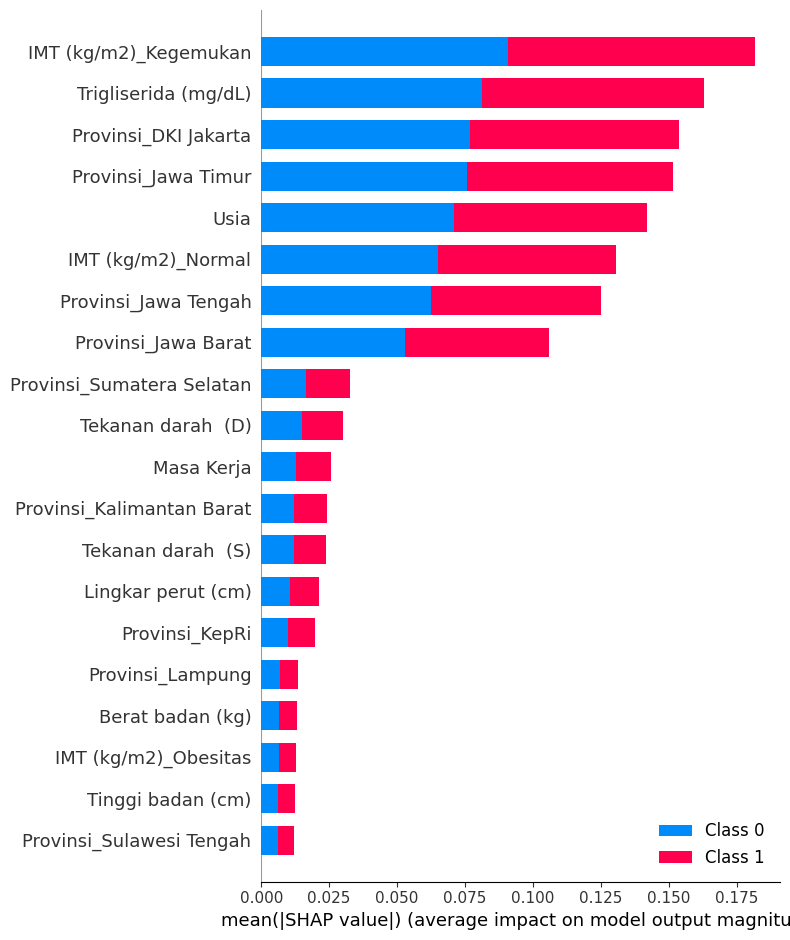

In [189]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, 
                  feature_names=X_test.columns.tolist(), 
                  plot_type="bar",
                 )

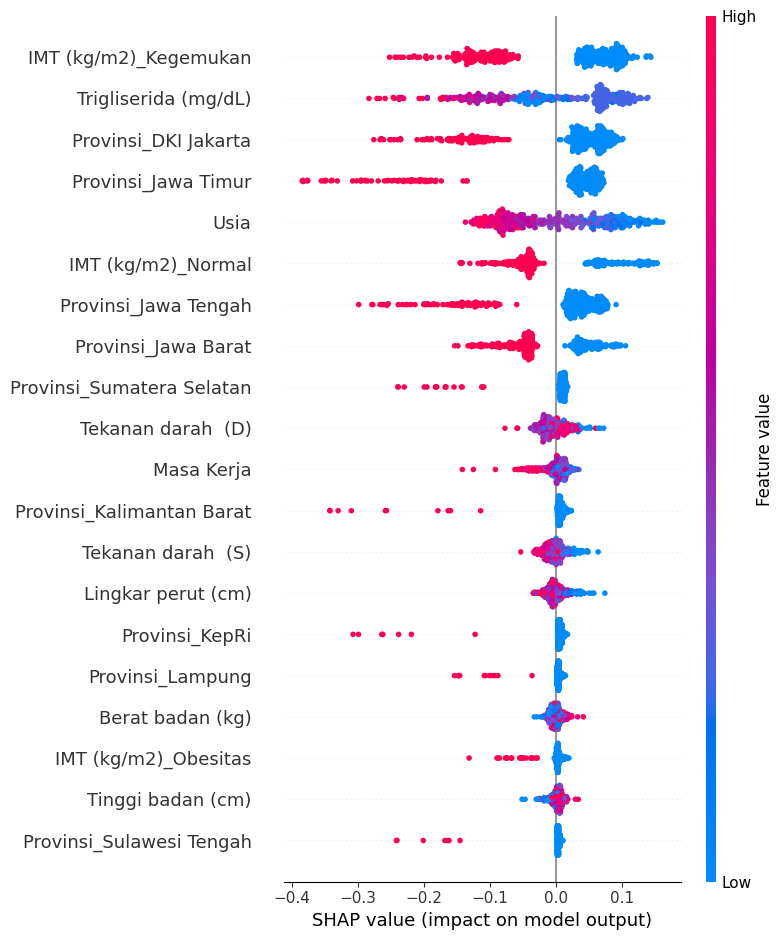

In [190]:
shap.summary_plot(shap_values[0], X_test)

Interpretasi model:
1. Jika IMT berkategori kegemukan maka meningkatkan risiko kolesterol tinggi sebanyak 10.03%
2. Jika Provinsi terletak di DKI Jakarta kemungkinan memiliki kolesterol tinggi naik hingga 7.33%, Jawa Timur 6.79%, Jawa Tengah 6.58%, Jawa Barat 2.66%, Kalimantan Barat 1.09%, Sumatera Selatan 0.41%, Sulawesi tengah 0.31%, Kepri 0.16%.
3. Jika trigliserida meningkat sebanyak 1 satuan setelah distandardisasi maka secara rata-rata akan meningkatkan risiko kolesterol sebanyak 3.88%, dengan syarat variabel lain konstan.
4. Jika usia meningkat sebanyak 1 satuan setelah distandardisasi maka secara rata-rata akan meningkatkan risiko kolesterol sebanyak 1.05%, dengan syarat variabel lain konstan.
5. Jika masa kerja meningkat sebanyak 1 satuan setelah distandardisasi maka secara rata-rata akan meningkatkan risiko kolesterol sebanyak 0.95% dengan syarat variabel lain konstan.
6. Jika tekanan darah distolik meningkat sebanyak 1 satuan setelah distandardisasi maka secara rata-rata akan meningkatkan risiko kolesterol sebanyak 0.47%, dengan syarat variabel lain konstan.
7. Jika lingkar perut meningkat sebanyak 1 satuan setelah distandardisasi maka secara rata-rata akan meningkatkan risiko kolesterol sebanyak 0.39%, dengan syarat variabel lain konstan.
8. Jika tekanan darah sistolik meningkat sebanyak 1 satuan setelah distandardisasi maka secara rata-rata akan meningkatkan risiko kolesterol sebanyak 0.37%, dengan syarat variabel lain konstan.
9. Jika tinggi badan meningkat sebanyak 1 satuan setelah distandardisasi maka secara rata-rata akan meningkatkan risiko kolesterol sebanyak 0.16%, dengan syarat variabel lain konstan.
10. Jika jenis kelamin laki-laki maka meningkatkan risiko kolesterol tinggi sebanyak 0.08%
11. Jika berat badan meningkat sebanyak 1 satuan setelah distandardisasi maka secara rata-rata akan meningkatkan risiko kolesterol sebanyak 0.04%, dengan syarat variabel lain konstan.

<a href="#top">☝️ Back to top</a>    

# Voting

Voting classifier adalah metode pembelajaran ensemble yang menggabungkan beberapa model dasar untuk menghasilkan solusi optimum akhir. Kami membuat satu model tunggal yang dilatih dengan menggunakan model-model tersebut dan memprediksi output berdasarkan mayoritas suara kombinasi dari setiap kelas output.

Algoritma ini mengumpulkan hasil dari setiap classifier yang dimasukkan ke dalam Voting Classifier dan memprediksi kelas output berdasarkan mayoritas suara tertinggi.

Karena voting bergantung pada kinerja banyak model, mereka tidak akan terpengaruh oleh kesalahan besar atau klasifikasi yang salah dari satu model. Dengan kata lain, kinerja buruk dari satu model dapat dikompensasi oleh kinerja kuat dari model lainnya. Ini membuat voting classifier lebih tangguh dan dapat memberikan hasil yang lebih konsisten daripada model tunggal.

## 2.7 **Hard Voting** <a class="anchor" id="2.6"></a>



Hard voting (atau disebut juga sebagai majority voting) adalah teknik di mana setiap model menghasilkan prediksi kelas secara independen. Kelas output dipilih berdasarkan mayoritas suara tertinggi.

Misalkan terdapat tiga classifier yang memprediksi kelas output (A, A, B), maka mayoritas memprediksi kelas A sebagai output. Oleh karena itu, A akan menjadi prediksi akhir dari hard voting.

Ilustrasi kerja hard voting

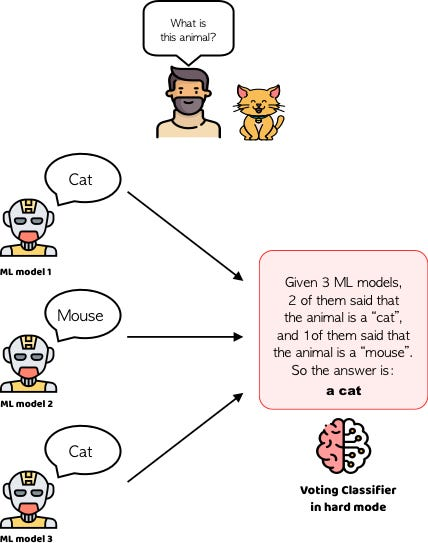

In [177]:
estimator = []
estimator.append(('Neural Network', MLPClassifier(max_iter = 10000) ))
estimator.append(('LogisticRegression', LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 200)))
estimator.append(('ExtraTreesClassifier', ExtraTreesClassifier() ))
estimator.append(('RandomForest', RandomForestClassifier() ))
estimator.append(('KNN', KNeighborsClassifier() ))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('AdaBoostClassifier', AdaBoostClassifier() ))
estimator.append(('GradientBoostingClassifier', GradientBoostingClassifier() ))
estimator.append(('XGB', XGBClassifier() ))
estimator.append(('CatBoost', CatBoostClassifier(logging_level='Silent') ))

In [178]:
VC_hard = VotingClassifier(estimators = estimator, voting ='hard')
VC_hard.fit(X_train, y_train)
y_pred = VC_hard.predict(X_test)

In [179]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.95      0.97       218
        True       0.96      1.00      0.98       225

    accuracy                           0.98       443
   macro avg       0.98      0.97      0.98       443
weighted avg       0.98      0.98      0.98       443



In [180]:
cm = confusion_matrix(y_test, y_pred)

VC_hard_Recall = recall_score(y_test, y_pred)
VC_hard_Precision = precision_score(y_test, y_pred)
VC_hard_f1 = f1_score(y_test, y_pred)
VC_hard_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[208  10]
 [  1 224]]


In [181]:
from statistics import stdev
score = cross_val_score(VC_hard, X_train, y_train, cv=5, scoring='recall')
VC_hard_cv_score = score.mean()
VC_hard_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', VC_hard_cv_score)
print('Cross Validation Recall standard deviation: ', VC_hard_cv_stdev)

Cross Validation Recall scores are: [0.97087379 0.99029126 0.97058824 0.98039216 0.99019608]
Average Cross Validation Recall score:  0.980468303826385
Cross Validation Recall standard deviation:  0.00975700294371798


In [182]:
ndf = [(VC_hard_Recall, VC_hard_Precision, VC_hard_f1, VC_hard_accuracy, VC_hard_cv_score, VC_hard_cv_stdev)]

VC_hard_score = pd.DataFrame(data = ndf, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
VC_hard_score.insert(0, 'Voting Classifier', 'Hard Voting')
VC_hard_score

,Voting Classifier,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation of CV Recall
0,Hard Voting,0.995556,0.957265,0.976035,0.975169,0.980468,0.009757


<a href="#top">☝️ Back to top</a>    

## 2.8 **Soft Voting** <a class="anchor" id="2.7"></a>

Pada soft voting, kelas output diprediksi berdasarkan rata-rata probabilitas yang diberikan untuk setiap kelas. Soft voting melibatkan kombinasi probabilitas dari setiap prediksi dalam setiap model dan memilih prediksi dengan total probabilitas tertinggi.

Setiap classifier model dasar secara independen memberikan probabilitas kemunculan setiap jenis kelas. Pada akhirnya, rata-rata probabilitas dari setiap kelas dihitung, dan output akhir adalah kelas yang memiliki probabilitas tertinggi.

Misalkan diberikan beberapa input kepada tiga model, di mana prediksi probabilitas untuk kelas A adalah (0.8, 0.4, 0.9) dan untuk kelas B adalah (0.20, 0.60, 0.10). Maka rata-rata untuk kelas A adalah 0.7 dan untuk kelas B adalah 0.3. Pemenangnya jelas adalah kelas A karena memiliki probabilitas tertinggi yang dihitung secara rata-rata dari setiap classifier.

Ilustrasi Kerja Soft Voting


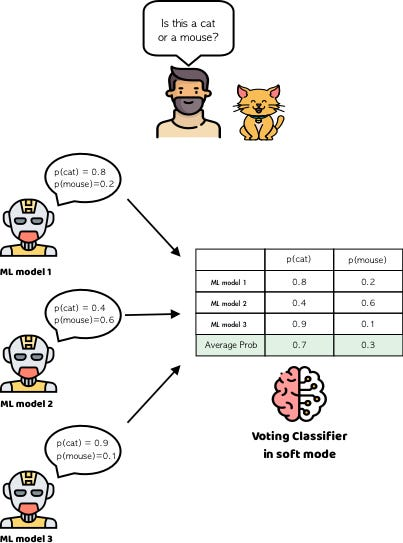

In [176]:
VC_soft = VotingClassifier(estimators = estimator, voting ='soft')
VC_soft.fit(X_train, y_train)
y_pred = VC_soft.predict(X_test)

In [162]:
VC_soft = VotingClassifier(estimators = estimator, voting ='soft')
VC_soft.fit(X_train, y_train)
y_pred = VC_soft.predict(X_test)

In [163]:
cm = confusion_matrix(y_test, y_pred)

VC_soft_Recall = recall_score(y_test, y_pred)
VC_soft_Precision = precision_score(y_test, y_pred)
VC_soft_f1 = f1_score(y_test, y_pred)
VC_soft_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[209   9]
 [  0 225]]


In [164]:
score2 = cross_val_score(VC_soft, X_train, y_train, cv=5, scoring='recall')

In [165]:
VC_soft_cv_score = score2.mean()
VC_soft_cv_stdev = stdev(score2)

print('Cross Validation Recall scores are: {}'.format(score2))
print('Average Cross Validation Recall score: ', VC_soft_cv_score)
print('Cross Validation Recall standard deviation: ', VC_soft_cv_stdev)

Cross Validation Recall scores are: [0.97087379 0.99029126 0.97058824 1.         0.99019608]
Average Cross Validation Recall score:  0.9843898724538359
Cross Validation Recall standard deviation:  0.013089922462854625


In [166]:
ndf2 = [(VC_soft_Recall, VC_soft_Precision, VC_soft_f1, VC_soft_accuracy, VC_soft_cv_score, VC_soft_cv_stdev)]

VC_soft_score = pd.DataFrame(data = ndf2, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
VC_soft_score.insert(0, 'Voting Classifier', 'Soft Voting')
VC_soft_score

,Voting Classifier,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation of CV Recall
0,Soft Voting,1.0,0.961538,0.980392,0.979684,0.98439,0.01309


In [167]:
predictions = pd.concat([VC_hard_score, VC_soft_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Avg CV Recall'], ascending=False)

,Voting Classifier,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation of CV Recall
0,Hard Voting,0.995556,0.961373,0.978166,0.977427,0.98439,0.01309
1,Soft Voting,1.000000,0.961538,0.980392,0.979684,0.98439,0.01309


Dapat terlihat bahwa soft voting atau hard voting tidak terlalu meningkatkan metriks dengan signifikan, mungkin pada recall saja dapat meningkatkan hingga 100%

<a href="#top">☝️ Back to top</a>    

---
# 3. **Concluding Remarks** <a class="anchor" id="3"></a>
---

* Untuk pre-processingnya dilakukan diantaranya adalah binning, feature selection, SMOTE oversampling, standardize
* Model terbaik yang didapatkan adalah model ExtraTrees
* Menurut EliPermutation dan SHAP, faktor yang paling berpengaruh adalah IMT berjenis kegemukan, Trigliserida, Provinsi (DKI Jakarta, Jawa Timur, Jawa Tengah, Jawa Barat), Usia, Masa Kerja, Lingkar Perut, Tinggi Badan, dan Berat Badan.

# 4. **Reference** <a class="anchor" id="4"></a>

1. https://www.hopkinsmedicine.org/health/wellness-and-prevention/cholesterol-5-truths-to-know
2. https://www.heart.org/en/health-topics/cholesterol/about-cholesterol#:~:text=Cholesterol%20can%20join%20with%20other,health%20care%20professional%20if%20needed.
3. https://world-heart-federation.org/what-we-do/cholesterol/#:~:text=The%20liver%20either%20makes%20cholesterol,or%207.8%25%20of%20all%20deaths.
4. https://www.who.int/news-room/fact-sheets/detail/hypertension
5. https://diabetes.org/
6. https://www.nih.gov/
7. https://www.halodoc.com/artikel/ketahui-komposisi-lemak-tubuh-yang-ideal-agar-tetap-sehat
8. https://sardjito.co.id/2019/03/08/visceral-fat-si-lemak-aktif-yang-tersembunyi/#:~:text=Rasio%200.94%20bagi%20pria%20dan,dan%20wanita%20kurang%20dari%200.84.
9. https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
10. https://statistics.laerd.com/spss-tutorials/point-biserial-correlation-using-spss-statistics.php
11. https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
12. https://rpubs.com/Dewikin912/Tutorial-Univariate-outliers-metode-IQR-dengan-R
13. https://www.simplilearn.com/tutorials/machine-learning-tutorial/feature-selection-in-machine-learning
14. https://imbalanced-learn.org/stable/index.html
15. https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/
16. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ 
17. https://ejurnal.stmik-budidarma.ac.id/index.php/mib/article/viewFile/6856/3676#:~:text=Proses%20Standar%20Scaler%20dalam%20penelitian,meningkatkan%20akurasi%20algoritma%20pemrosesan%20data.
18. https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/
19. https://www.geeksforgeeks.org/regularization-in-machine-learning/
20. [fenix.tecnico.ulisboa.pt/downloadFile/1689244997261302/Tese_final_fenix.pdf](http://fenix.tecnico.ulisboa.pt/downloadFile/1689244997261302/Tese_final_fenix.pdf)
21. https://www.sciencedirect.com/science/article/abs/pii/S0034425797000837?via%3Dihub
22. https://www.researchgate.net/publication/228529307_Evaluation_From_Precision_Recall_and_F-Factor_to_ROC_Informedness_Markedness_Correlation
23. https://people.inf.elte.hu/kiss/11dwhdm/roc.pdf
24. https://link.springer.com/referencework/10.1007/978-0-387-30164-8
25. https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html